In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv('api_keys.env')

True

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [4]:
# Import alpaca-py as alpaca
from alpaca.data.historical import CryptoHistoricalDataClient
from alpaca.data.requests import CryptoLatestQuoteRequest, CryptoBarsRequest
from alpaca.data.timeframe import TimeFrame
from datetime import datetime

In [5]:
# Declaring variable for client
client = CryptoHistoricalDataClient()

In [6]:
# Setting up params for request
request_params = CryptoLatestQuoteRequest(symbol_or_symbols="BTC/USD")

In [7]:
# Grabbing latest price with client
latest_quote = client.get_crypto_latest_quote(request_params)

In [8]:
# must use symbol to access even though it is single symbol
latest_quote["BTC/USD"].ask_price

29676.99

In [9]:
# Updating params for historical price data
request_params = CryptoBarsRequest(
                        symbol_or_symbols=["BTC/USD"],
                        timeframe=TimeFrame.Day,
                        start=datetime.strptime("2020-04-01", '%Y-%m-%d')
                        )

In [10]:
# Grabbing historical data
bars = client.get_crypto_bars(request_params)

In [11]:
# convert to dataframe
bars.df

open      high       low     close  \
symbol  timestamp                                                           
BTC/USD 2020-04-08 05:00:00+00:00   7314.00   7314.00   7314.00   7314.00   
        2020-04-14 05:00:00+00:00   7101.50   7101.50   7100.00   7100.00   
        2020-04-22 05:00:00+00:00   7118.50   7118.50   7118.50   7118.50   
        2020-04-28 05:00:00+00:00   7748.50   7836.00   7748.50   7836.00   
        2020-04-30 05:00:00+00:00   8829.00   8829.00   8653.00   8653.00   
...                                     ...       ...       ...       ...   
        2023-04-22 05:00:00+00:00  27369.35  27925.21  27218.64  27620.98   
        2023-04-23 05:00:00+00:00  27619.32  28014.46  27350.11  27722.79   
        2023-04-24 05:00:00+00:00  27720.25  27783.28  26975.61  27432.28   
        2023-04-25 05:00:00+00:00  27432.28  28496.36  27209.76  28346.29   
        2023-04-26 05:00:00+00:00  28347.67  30046.27  28328.20  29698.29   

                                       volume  trade_count          vwap  
symbol  timestamp                                                         
BTC/USD 2020-04-08 05:00:00+00:00     0.00010          1.0   7314.000000  
        2020-04-14 05:00:00+00:00     0.00020          2.0   7100.750000  
        2020-04-22 05:00:00+00:00     0.00010          1.0   7118.500000  
        2020-04-28 05:00:00+00:00     0.08400          2.0   7835.687500  
        2020-04-30 05:00:00+00:00     0.01340          3.0   8715.805970  
...                                       ...          ...           ...  
        2023-04-22 05:00:00+00:00  3430.56744      69989.0  27582.492681  
        2023-04-23 05:00:00+00:00  6305.93546     102694.0  27624.636664  
        2023-04-24 05:00:00+00:00  7526.74607     118820.0  27419.792990  
        2023-04-25 05:00:00+00:00  7512.51449     131886.0  27834.197811  
        2023-04-26 05:00:00+00:00  4648.85419      74521.0  29053.131543  

[1084 rows x 7 columns]

In [12]:
# Setting as dataframe variable
btc_df = bars.df
btc_df

open      high       low     close  \
symbol  timestamp                                                           
BTC/USD 2020-04-08 05:00:00+00:00   7314.00   7314.00   7314.00   7314.00   
        2020-04-14 05:00:00+00:00   7101.50   7101.50   7100.00   7100.00   
        2020-04-22 05:00:00+00:00   7118.50   7118.50   7118.50   7118.50   
        2020-04-28 05:00:00+00:00   7748.50   7836.00   7748.50   7836.00   
        2020-04-30 05:00:00+00:00   8829.00   8829.00   8653.00   8653.00   
...                                     ...       ...       ...       ...   
        2023-04-22 05:00:00+00:00  27369.35  27925.21  27218.64  27620.98   
        2023-04-23 05:00:00+00:00  27619.32  28014.46  27350.11  27722.79   
        2023-04-24 05:00:00+00:00  27720.25  27783.28  26975.61  27432.28   
        2023-04-25 05:00:00+00:00  27432.28  28496.36  27209.76  28346.29   
        2023-04-26 05:00:00+00:00  28347.67  30046.27  28328.20  29698.29   

                                       volume  trade_count          vwap  
symbol  timestamp                                                         
BTC/USD 2020-04-08 05:00:00+00:00     0.00010          1.0   7314.000000  
        2020-04-14 05:00:00+00:00     0.00020          2.0   7100.750000  
        2020-04-22 05:00:00+00:00     0.00010          1.0   7118.500000  
        2020-04-28 05:00:00+00:00     0.08400          2.0   7835.687500  
        2020-04-30 05:00:00+00:00     0.01340          3.0   8715.805970  
...                                       ...          ...           ...  
        2023-04-22 05:00:00+00:00  3430.56744      69989.0  27582.492681  
        2023-04-23 05:00:00+00:00  6305.93546     102694.0  27624.636664  
        2023-04-24 05:00:00+00:00  7526.74607     118820.0  27419.792990  
        2023-04-25 05:00:00+00:00  7512.51449     131886.0  27834.197811  
        2023-04-26 05:00:00+00:00  4648.85419      74521.0  29053.131543  

[1084 rows x 7 columns]

In [13]:
# Checking info
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1084 entries, ('BTC/USD', Timestamp('2020-04-08 05:00:00+0000', tz='UTC')) to ('BTC/USD', Timestamp('2023-04-26 05:00:00+0000', tz='UTC'))
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open         1084 non-null   float64
 1   high         1084 non-null   float64
 2   low          1084 non-null   float64
 3   close        1084 non-null   float64
 4   volume       1084 non-null   float64
 5   trade_count  1084 non-null   float64
 6   vwap         1084 non-null   float64
dtypes: float64(7)
memory usage: 103.4+ KB


In [14]:
# Reset index to access symbol and timestamp as columns
btc_df = btc_df.reset_index()
btc_df.head()

symbol                 timestamp    open    high     low   close  volume  \
0  BTC/USD 2020-04-08 05:00:00+00:00  7314.0  7314.0  7314.0  7314.0  0.0001   
1  BTC/USD 2020-04-14 05:00:00+00:00  7101.5  7101.5  7100.0  7100.0  0.0002   
2  BTC/USD 2020-04-22 05:00:00+00:00  7118.5  7118.5  7118.5  7118.5  0.0001   
3  BTC/USD 2020-04-28 05:00:00+00:00  7748.5  7836.0  7748.5  7836.0  0.0840   
4  BTC/USD 2020-04-30 05:00:00+00:00  8829.0  8829.0  8653.0  8653.0  0.0134   

   trade_count        vwap  
0          1.0  7314.00000  
1          2.0  7100.75000  
2          1.0  7118.50000  
3          2.0  7835.68750  
4          3.0  8715.80597

In [15]:
# Revising time out of timestamp column
import datetime as dt
btc_df['timestamp'] = btc_df['timestamp'].dt.date
btc_df.head()

symbol   timestamp    open    high     low   close  volume  trade_count  \
0  BTC/USD  2020-04-08  7314.0  7314.0  7314.0  7314.0  0.0001          1.0   
1  BTC/USD  2020-04-14  7101.5  7101.5  7100.0  7100.0  0.0002          2.0   
2  BTC/USD  2020-04-22  7118.5  7118.5  7118.5  7118.5  0.0001          1.0   
3  BTC/USD  2020-04-28  7748.5  7836.0  7748.5  7836.0  0.0840          2.0   
4  BTC/USD  2020-04-30  8829.0  8829.0  8653.0  8653.0  0.0134          3.0   

         vwap  
0  7314.00000  
1  7100.75000  
2  7118.50000  
3  7835.68750  
4  8715.80597

In [16]:
# Setting up pivot to get subset of closing prices
btc_pivot = btc_df.pivot_table(values='close', index='timestamp', columns='symbol')
btc_pivot.head()

symbol      BTC/USD
timestamp          
2020-04-08   7314.0
2020-04-14   7100.0
2020-04-22   7118.5
2020-04-28   7836.0
2020-04-30   8653.0

In [17]:
# Checking for nulls
btc_pivot.isnull().sum()

symbol
BTC/USD    0
dtype: int64

In [18]:
# Running percentage change calculation and conversion
btc_daily = btc_pivot.pct_change()
btc_daily.head()

symbol       BTC/USD
timestamp           
2020-04-08       NaN
2020-04-14 -0.029259
2020-04-22  0.002606
2020-04-28  0.100794
2020-04-30  0.104262

In [19]:
# Recheck nulls
btc_daily.isnull().sum()

symbol
BTC/USD    1
dtype: int64

In [20]:
# Drop nulls
btc_daily = btc_daily.dropna()
btc_daily.head()

symbol       BTC/USD
timestamp           
2020-04-14 -0.029259
2020-04-22  0.002606
2020-04-28  0.100794
2020-04-30  0.104262
2020-05-01  0.018895

In [21]:
# Checking info
btc_daily.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1083 entries, 2020-04-14 to 2023-04-26
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BTC/USD  1083 non-null   float64
dtypes: float64(1)
memory usage: 16.9+ KB


In [22]:
# Setting up dependencies for stock price data
from alpaca.data.historical import StockHistoricalDataClient
from alpaca.data.requests import StockBarsRequest

In [23]:
# keys required for stock historical data client
stock_client = StockHistoricalDataClient(alpaca_api_key, alpaca_secret_key)

In [24]:
# params request for multiple tickers
multisymbol_request_params = StockBarsRequest(symbol_or_symbols=["SPY", "GLD", "TLT"],
                                              timeframe=TimeFrame.Day, 
                                              start=datetime.strptime("2020-04-08", '%Y-%m-%d')
                                             )

In [25]:
# pulling data
historical_quotes = stock_client.get_stock_bars(multisymbol_request_params)

In [26]:
# Display as dataframe
historical_quotes.df

open      high       low   close  \
symbol timestamp                                                       
GLD    2020-04-08 04:00:00+00:00  155.91  155.9400  154.5900  154.65   
       2020-04-09 04:00:00+00:00  158.08  159.0800  157.2100  158.58   
       2020-04-13 04:00:00+00:00  159.17  162.3800  158.6250  161.41   
       2020-04-14 04:00:00+00:00  162.73  164.4200  161.7800  162.66   
       2020-04-15 04:00:00+00:00  161.80  162.5400  160.8061  162.00   
...                                  ...       ...       ...     ...   
TLT    2023-04-20 04:00:00+00:00  104.83  105.2800  104.7530  104.99   
       2023-04-21 04:00:00+00:00  105.31  105.4600  104.2700  104.40   
       2023-04-24 04:00:00+00:00  104.96  105.4875  104.8400  105.41   
       2023-04-25 04:00:00+00:00  106.33  107.1300  106.2800  106.96   
       2023-04-26 04:00:00+00:00  106.79  106.8300  106.6600  106.68   

                                      volume  trade_count        vwap  
symbol timestamp                                                       
GLD    2020-04-08 04:00:00+00:00   7600804.0      60704.0  155.233884  
       2020-04-09 04:00:00+00:00  18123039.0     140239.0  158.255634  
       2020-04-13 04:00:00+00:00  20549213.0     140401.0  160.906373  
       2020-04-14 04:00:00+00:00  17095086.0     146336.0  163.197557  
       2020-04-15 04:00:00+00:00  12141890.0      95518.0  161.749049  
...                                      ...          ...         ...  
TLT    2023-04-20 04:00:00+00:00  16449259.0      87343.0  104.942524  
       2023-04-21 04:00:00+00:00  14042699.0      92745.0  104.567245  
       2023-04-24 04:00:00+00:00  17033892.0      83333.0  105.290744  
       2023-04-25 04:00:00+00:00  21778396.0     140118.0  106.836514  
       2023-04-26 04:00:00+00:00    992869.0       7292.0  106.685309  

[2304 rows x 7 columns]

In [27]:
# Save as df variable
stock_df = historical_quotes.df
stock_df

open      high       low   close  \
symbol timestamp                                                       
GLD    2020-04-08 04:00:00+00:00  155.91  155.9400  154.5900  154.65   
       2020-04-09 04:00:00+00:00  158.08  159.0800  157.2100  158.58   
       2020-04-13 04:00:00+00:00  159.17  162.3800  158.6250  161.41   
       2020-04-14 04:00:00+00:00  162.73  164.4200  161.7800  162.66   
       2020-04-15 04:00:00+00:00  161.80  162.5400  160.8061  162.00   
...                                  ...       ...       ...     ...   
TLT    2023-04-20 04:00:00+00:00  104.83  105.2800  104.7530  104.99   
       2023-04-21 04:00:00+00:00  105.31  105.4600  104.2700  104.40   
       2023-04-24 04:00:00+00:00  104.96  105.4875  104.8400  105.41   
       2023-04-25 04:00:00+00:00  106.33  107.1300  106.2800  106.96   
       2023-04-26 04:00:00+00:00  106.79  106.8300  106.6600  106.68   

                                      volume  trade_count        vwap  
symbol timestamp                                                       
GLD    2020-04-08 04:00:00+00:00   7600804.0      60704.0  155.233884  
       2020-04-09 04:00:00+00:00  18123039.0     140239.0  158.255634  
       2020-04-13 04:00:00+00:00  20549213.0     140401.0  160.906373  
       2020-04-14 04:00:00+00:00  17095086.0     146336.0  163.197557  
       2020-04-15 04:00:00+00:00  12141890.0      95518.0  161.749049  
...                                      ...          ...         ...  
TLT    2023-04-20 04:00:00+00:00  16449259.0      87343.0  104.942524  
       2023-04-21 04:00:00+00:00  14042699.0      92745.0  104.567245  
       2023-04-24 04:00:00+00:00  17033892.0      83333.0  105.290744  
       2023-04-25 04:00:00+00:00  21778396.0     140118.0  106.836514  
       2023-04-26 04:00:00+00:00    992869.0       7292.0  106.685309  

[2304 rows x 7 columns]

In [28]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2304 entries, ('GLD', Timestamp('2020-04-08 04:00:00+0000', tz='UTC')) to ('TLT', Timestamp('2023-04-26 04:00:00+0000', tz='UTC'))
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open         2304 non-null   float64
 1   high         2304 non-null   float64
 2   low          2304 non-null   float64
 3   close        2304 non-null   float64
 4   volume       2304 non-null   float64
 5   trade_count  2304 non-null   float64
 6   vwap         2304 non-null   float64
dtypes: float64(7)
memory usage: 155.2+ KB


In [29]:
# Reset index to access symbol and timestamp as columns
stock_df = stock_df.reset_index()
stock_df.head()

symbol                 timestamp    open    high       low   close  \
0    GLD 2020-04-08 04:00:00+00:00  155.91  155.94  154.5900  154.65   
1    GLD 2020-04-09 04:00:00+00:00  158.08  159.08  157.2100  158.58   
2    GLD 2020-04-13 04:00:00+00:00  159.17  162.38  158.6250  161.41   
3    GLD 2020-04-14 04:00:00+00:00  162.73  164.42  161.7800  162.66   
4    GLD 2020-04-15 04:00:00+00:00  161.80  162.54  160.8061  162.00   

       volume  trade_count        vwap  
0   7600804.0      60704.0  155.233884  
1  18123039.0     140239.0  158.255634  
2  20549213.0     140401.0  160.906373  
3  17095086.0     146336.0  163.197557  
4  12141890.0      95518.0  161.749049

In [30]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   symbol       2304 non-null   object             
 1   timestamp    2304 non-null   datetime64[ns, UTC]
 2   open         2304 non-null   float64            
 3   high         2304 non-null   float64            
 4   low          2304 non-null   float64            
 5   close        2304 non-null   float64            
 6   volume       2304 non-null   float64            
 7   trade_count  2304 non-null   float64            
 8   vwap         2304 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(7), object(1)
memory usage: 162.1+ KB


In [31]:
# Revising time out of timestamp column
stock_df['timestamp'] = stock_df['timestamp'].dt.date
stock_df.head()

symbol   timestamp    open    high       low   close      volume  \
0    GLD  2020-04-08  155.91  155.94  154.5900  154.65   7600804.0   
1    GLD  2020-04-09  158.08  159.08  157.2100  158.58  18123039.0   
2    GLD  2020-04-13  159.17  162.38  158.6250  161.41  20549213.0   
3    GLD  2020-04-14  162.73  164.42  161.7800  162.66  17095086.0   
4    GLD  2020-04-15  161.80  162.54  160.8061  162.00  12141890.0   

   trade_count        vwap  
0      60704.0  155.233884  
1     140239.0  158.255634  
2     140401.0  160.906373  
3     146336.0  163.197557  
4      95518.0  161.749049

In [32]:
# Subset of SPY only
loc_df = stock_df.loc[(stock_df.symbol == 'SPY'), :]
loc_df.head()

symbol   timestamp    open      high       low   close       volume  \
768    SPY  2020-04-08  267.96  276.0000  265.2542  274.00  153774487.0   
769    SPY  2020-04-09  277.58  281.2000  275.4700  278.22  190283195.0   
770    SPY  2020-04-13  277.14  277.5100  271.4100  275.63  114868253.0   
771    SPY  2020-04-14  280.98  284.9000  275.5106  283.80  134143470.0   
772    SPY  2020-04-15  277.57  283.9407  275.4600  277.75  121779042.0   

     trade_count        vwap  
768     950859.0  271.051454  
769    1171999.0  278.251697  
770     752225.0  274.512847  
771     761246.0  282.089774  
772     711140.0  277.826041

In [33]:
# Pivot for SPY
spy_pivot = loc_df.pivot_table(values='close', index='timestamp', columns='symbol')
spy_pivot.head()

symbol         SPY
timestamp         
2020-04-08  274.00
2020-04-09  278.22
2020-04-13  275.63
2020-04-14  283.80
2020-04-15  277.75

In [34]:
# Checking info
spy_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 2020-04-08 to 2023-04-26
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     768 non-null    float64
dtypes: float64(1)
memory usage: 12.0+ KB


In [35]:
# Running percentage change calculation and conversion
spy_daily = spy_pivot.pct_change()
spy_daily.head()

symbol           SPY
timestamp           
2020-04-08       NaN
2020-04-09  0.015401
2020-04-13 -0.009309
2020-04-14  0.029641
2020-04-15 -0.021318

In [36]:
# Dropping nulls
spy_daily = spy_daily.dropna()
spy_daily.head()

symbol           SPY
timestamp           
2020-04-09  0.015401
2020-04-13 -0.009309
2020-04-14  0.029641
2020-04-15 -0.021318
2020-04-16  0.004356

In [37]:
# Subset of GLD only
gld_df = stock_df.loc[(stock_df.symbol == 'GLD'), :]
gld_df.head()

symbol   timestamp    open    high       low   close      volume  \
0    GLD  2020-04-08  155.91  155.94  154.5900  154.65   7600804.0   
1    GLD  2020-04-09  158.08  159.08  157.2100  158.58  18123039.0   
2    GLD  2020-04-13  159.17  162.38  158.6250  161.41  20549213.0   
3    GLD  2020-04-14  162.73  164.42  161.7800  162.66  17095086.0   
4    GLD  2020-04-15  161.80  162.54  160.8061  162.00  12141890.0   

   trade_count        vwap  
0      60704.0  155.233884  
1     140239.0  158.255634  
2     140401.0  160.906373  
3     146336.0  163.197557  
4      95518.0  161.749049

In [38]:
# Pivot for GLD
gld_pivot = gld_df.pivot_table(values='close', index='timestamp', columns='symbol')
gld_pivot.head()

symbol         GLD
timestamp         
2020-04-08  154.65
2020-04-09  158.58
2020-04-13  161.41
2020-04-14  162.66
2020-04-15  162.00

In [39]:
# Checking info
gld_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 2020-04-08 to 2023-04-26
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GLD     768 non-null    float64
dtypes: float64(1)
memory usage: 12.0+ KB


In [40]:
# Running percentage change calculation and conversion
gld_daily = gld_pivot.pct_change()
gld_daily.head()

symbol           GLD
timestamp           
2020-04-08       NaN
2020-04-09  0.025412
2020-04-13  0.017846
2020-04-14  0.007744
2020-04-15 -0.004058

In [41]:
# Dropping nulls
gld_daily = gld_daily.dropna()
gld_daily.head()

symbol           GLD
timestamp           
2020-04-09  0.025412
2020-04-13  0.017846
2020-04-14  0.007744
2020-04-15 -0.004058
2020-04-16 -0.001790

In [42]:
# Subset of TLT only
tlt_df = stock_df.loc[(stock_df.symbol == 'TLT'), :]
tlt_df.head()

symbol   timestamp    open    high     low   close      volume  \
1536    TLT  2020-04-08  165.11  166.19  164.13  165.09  10147077.0   
1537    TLT  2020-04-09  164.28  165.79  163.78  165.39  14260806.0   
1538    TLT  2020-04-13  164.75  165.71  163.88  163.88   8750297.0   
1539    TLT  2020-04-14  163.84  164.74  163.48  163.84   9019531.0   
1540    TLT  2020-04-15  166.80  168.60  166.74  168.18  10027752.0   

      trade_count        vwap  
1536      63686.0  165.217491  
1537      82515.0  164.996594  
1538      60771.0  164.679842  
1539      62051.0  164.073826  
1540      63827.0  167.874800

In [43]:
# Pivot for TLT
tlt_pivot = tlt_df.pivot_table(values='close', index='timestamp', columns='symbol')
tlt_pivot.head()

symbol         TLT
timestamp         
2020-04-08  165.09
2020-04-09  165.39
2020-04-13  163.88
2020-04-14  163.84
2020-04-15  168.18

In [44]:
# Checking info
tlt_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 2020-04-08 to 2023-04-26
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TLT     768 non-null    float64
dtypes: float64(1)
memory usage: 12.0+ KB


In [45]:
# Running percentage change calculation and conversion
tlt_daily = tlt_pivot.pct_change()
tlt_daily.head()

symbol           TLT
timestamp           
2020-04-08       NaN
2020-04-09  0.001817
2020-04-13 -0.009130
2020-04-14 -0.000244
2020-04-15  0.026489

In [46]:
# Dropping nulls
tlt_daily = tlt_daily.dropna()
tlt_daily.head()

symbol           TLT
timestamp           
2020-04-09  0.001817
2020-04-13 -0.009130
2020-04-14 -0.000244
2020-04-15  0.026489
2020-04-16  0.011357

In [47]:
# Running cumprod (cumulative product) function over BTC Daily Returns to calculate overall gain / loss
BTC_cumprod = (1 + btc_daily).cumprod()
BTC_prod_annotation = (BTC_cumprod.iloc[-1][0]*100).round().astype(int)
BTC_cumprod.head()

symbol       BTC/USD
timestamp           
2020-04-14  0.970741
2020-04-22  0.973270
2020-04-28  1.071370
2020-04-30  1.183074
2020-05-01  1.205428

In [48]:
# Running cumprod (cumulative product) function over SPY Daily Returns to calculate overall gain / loss
SPY_cumprod = (1 + spy_daily).cumprod()
SPY_prod_annotation = (SPY_cumprod.iloc[-1][0]*100).round().astype(int)
SPY_cumprod.head()

symbol           SPY
timestamp           
2020-04-09  1.015401
2020-04-13  1.005949
2020-04-14  1.035766
2020-04-15  1.013686
2020-04-16  1.018102

In [49]:
# Running cumprod (cumulative product) function over GLD Daily Returns to calculate overall gain / loss
GLD_cumprod = (1 + gld_daily).cumprod()
GLD_prod_annotation = (GLD_cumprod.iloc[-1][0]*100).round().astype(int)
GLD_cumprod.head()

symbol           GLD
timestamp           
2020-04-09  1.025412
2020-04-13  1.043712
2020-04-14  1.051794
2020-04-15  1.047527
2020-04-16  1.045651

In [50]:
# Running cumprod (cumulative product) function over TLT Daily Returns to calculate overall gain / loss
TLT_cumprod = (1 + tlt_daily).cumprod()
TLT_prod_annotation = (TLT_cumprod.iloc[-1][0]*100).round().astype(int)
TLT_cumprod.head()

symbol           TLT
timestamp           
2020-04-09  1.001817
2020-04-13  0.992671
2020-04-14  0.992428
2020-04-15  1.018717
2020-04-16  1.030287

In [51]:
# Running cumulative return against initial investment to obtain current market value of investment in BTC
initial_investment = 10000
btc_profit = initial_investment * BTC_cumprod
btc_annotation = btc_profit.iloc[-1][0].round().astype(int)
btc_profit.head()

symbol           BTC/USD
timestamp               
2020-04-14   9707.410446
2020-04-22   9732.704403
2020-04-28  10713.699754
2020-04-30  11830.735576
2020-05-01  12054.279464

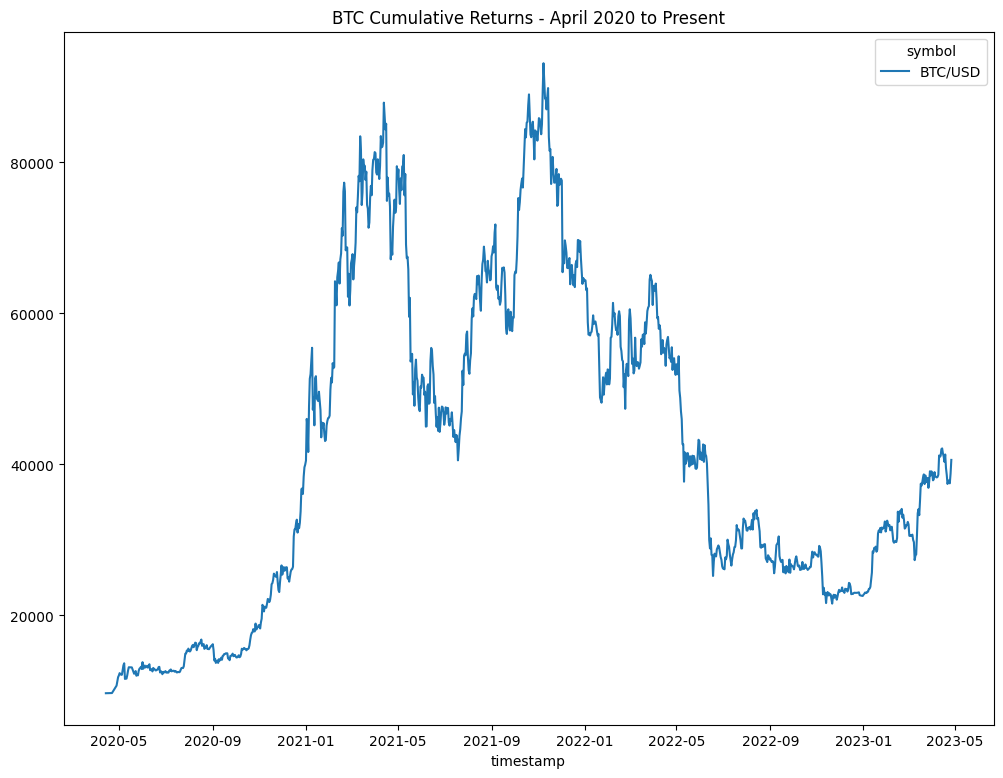

In [52]:
# Plot performance and save to Images
import matplotlib.pyplot as plt
btc_profit.plot(figsize=(12,9), legend=True, title="BTC Cumulative Returns - April 2020 to Present");
plt.savefig("Images/BTCCumulativeReturns.png")

In [53]:
# Running cumulative return against initial investment to obtain current market value of investment in SPY
spy_profit = initial_investment * SPY_cumprod
spy_annotation = spy_profit.iloc[-1][0].round().astype(int)
spy_profit.head()

symbol               SPY
timestamp               
2020-04-09  10154.014599
2020-04-13  10059.489051
2020-04-14  10357.664234
2020-04-15  10136.861314
2020-04-16  10181.021898

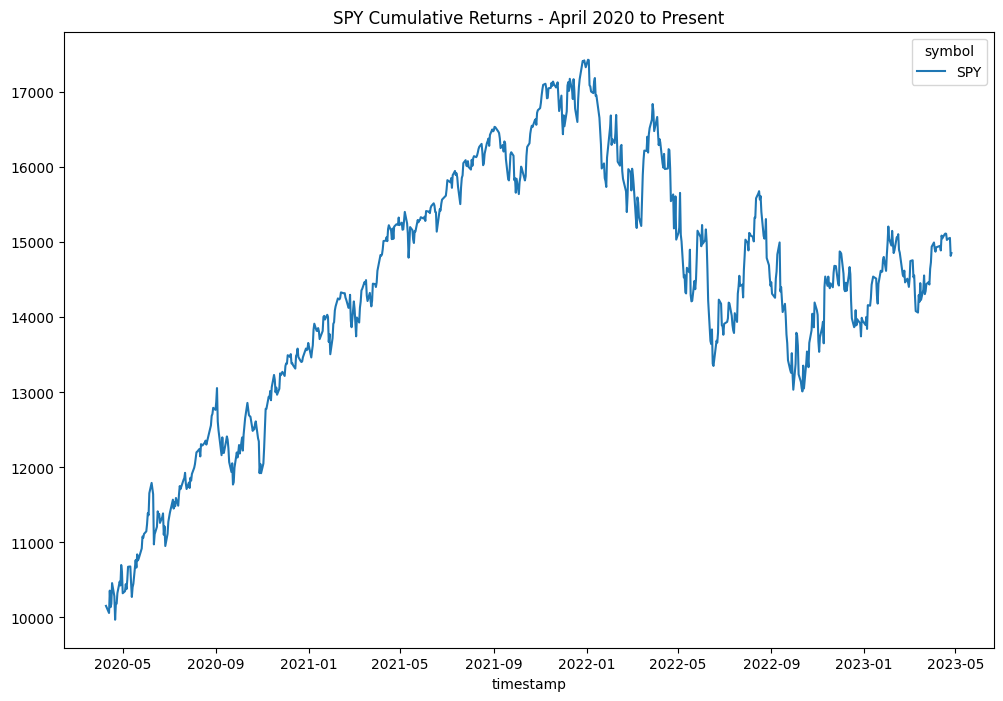

In [54]:
# Plot performance and save to Images
spy_profit.plot(figsize=(12,8), legend=True, title="SPY Cumulative Returns - April 2020 to Present");
plt.savefig("Images/SPYCumulativeReturns.png")

In [55]:
# Running cumulative return against initial investment to obtain current market value of investment in GLD
gld_profit = initial_investment * GLD_cumprod
gld_annotation = gld_profit.iloc[-1][0].round().astype(int)
gld_profit.head()

symbol               GLD
timestamp               
2020-04-09  10254.122211
2020-04-13  10437.116069
2020-04-14  10517.943744
2020-04-15  10475.266731
2020-04-16  10456.514711

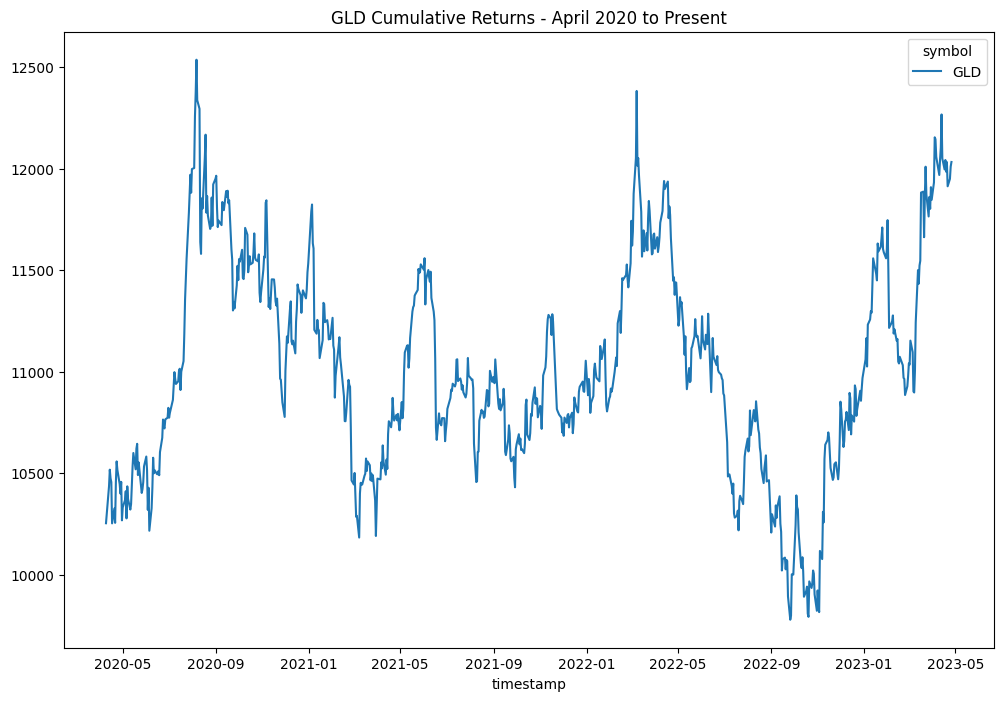

In [56]:
# Plot performance and save to Images
gld_profit.plot(figsize=(12,8), legend=True, title="GLD Cumulative Returns - April 2020 to Present");
plt.savefig("Images/GLDCumulativeReturns.png")

In [57]:
# Running cumulative return against initial investment to obtain current market value of investment in TLT
tlt_profit = initial_investment * TLT_cumprod
tlt_annotation = tlt_profit.iloc[-1][0].round().astype(int)
tlt_profit.head()

symbol               TLT
timestamp               
2020-04-09  10018.171906
2020-04-13   9926.706645
2020-04-14   9924.283724
2020-04-15  10187.170634
2020-04-16  10302.865104

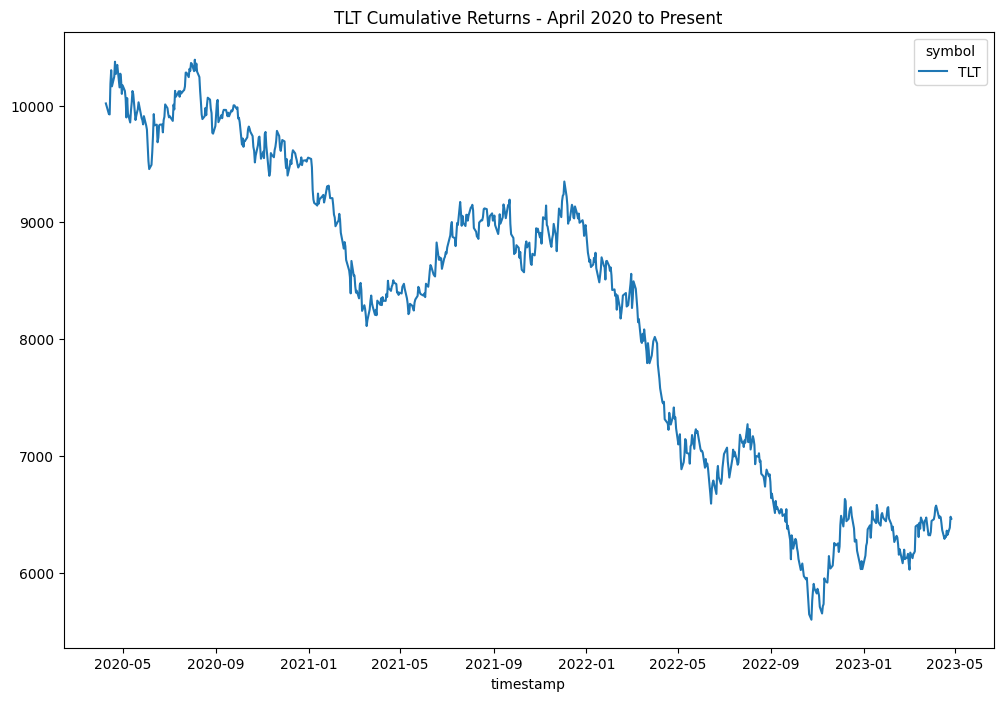

In [58]:
# Plot performance and save to Images
tlt_profit.plot(figsize=(12,8), legend=True, title="TLT Cumulative Returns - April 2020 to Present");
plt.savefig("Images/TLTCumulativeReturns.png")

In [59]:
# Creating date variables to use in plot
from datetime import date, timedelta
days_after_xlim = (date.today()+timedelta(days=88)).isoformat()

days_after_stocks = (date.today()+timedelta(days=2)).isoformat()

days_after_btc = (date.today()+timedelta(days=1)).isoformat()

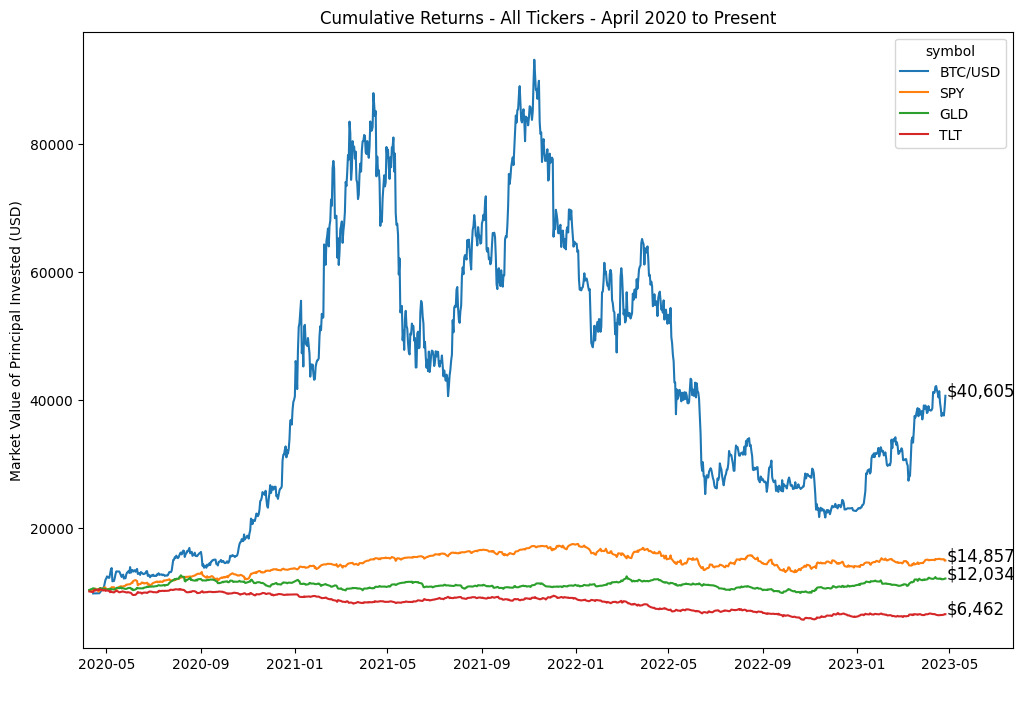

In [60]:
# Overlay of cumulative performances, $10k original investment
ax = btc_profit.plot(figsize=(12,8), legend=True, title="Cumulative Returns - All Tickers - April 2020 to Present")
spy_profit.plot(ax=ax, legend=True)
gld_profit.plot(ax=ax, legend=True)
tlt_profit.plot(ax=ax, legend=True)
ax.text(days_after_stocks, tlt_annotation, f"${tlt_annotation:,}", size=12)
ax.text(days_after_stocks, gld_annotation, f"${gld_annotation:,}", size=12)
ax.text(days_after_stocks, spy_annotation, f"${spy_annotation:,}", size=12)
ax.text(days_after_btc, btc_annotation, f"${btc_annotation:,}", size=12)
ax.set(ylabel='Market Value of Principal Invested (USD)',
       xlabel=' ')
ax.set_xlim('2020-04', days_after_xlim)
plt.savefig("Images/OverlayCumulativeReturns.png");

In [61]:
btc_profit.max()

symbol
BTC/USD    93136.450643
dtype: float64

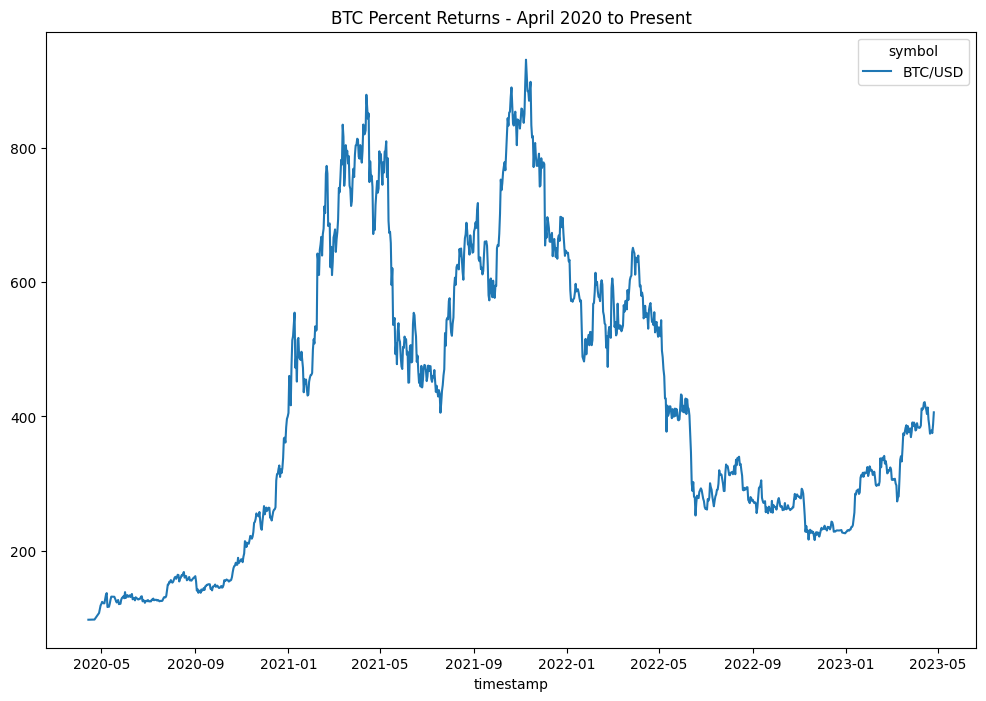

In [62]:
# Plot performance in percentage terms and save to Images
(BTC_cumprod*100).plot(figsize=(12,8), legend=True, title="BTC Percent Returns - April 2020 to Present");
plt.savefig("Images/BTCPercentReturns.png")

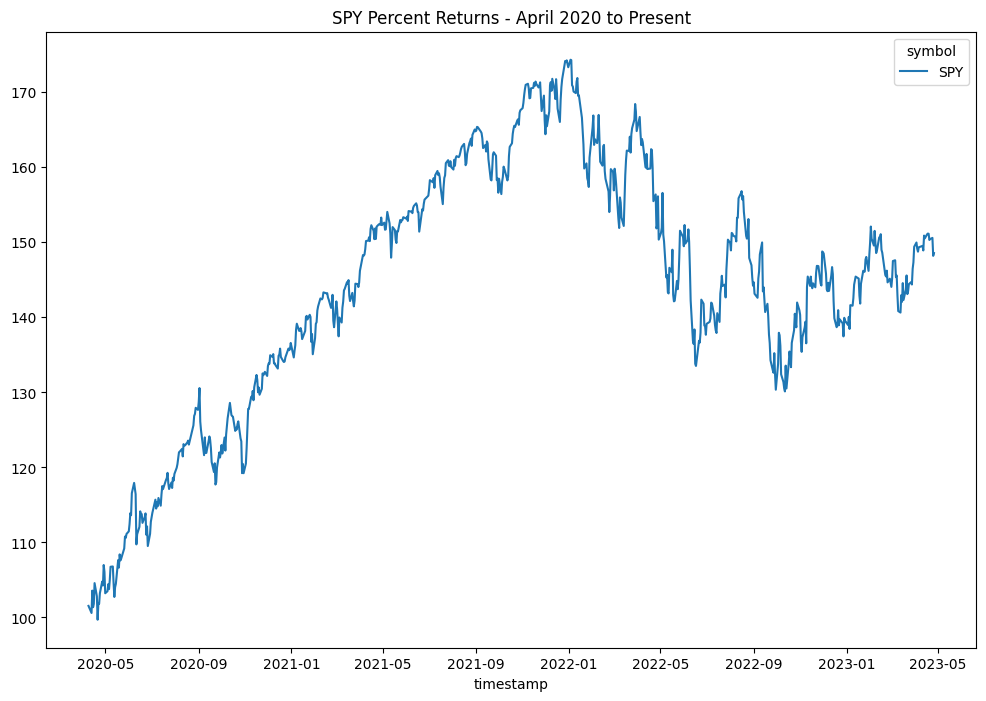

In [63]:
# Plot performance in percentage terms and save to Images
(SPY_cumprod*100).plot(figsize=(12,8), legend=True, title="SPY Percent Returns - April 2020 to Present");
plt.savefig("Images/SPYPercentReturns.png")

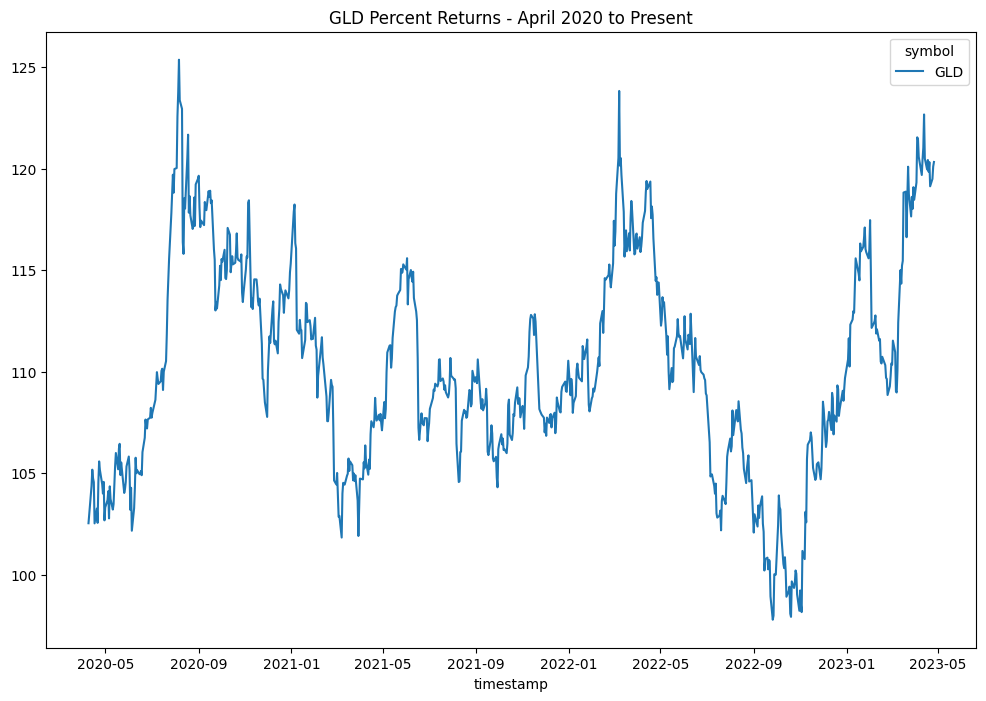

In [64]:
# Plot performance in percentage terms and save to Images
(GLD_cumprod*100).plot(figsize=(12,8), legend=True, title="GLD Percent Returns - April 2020 to Present");
plt.savefig("Images/GLDPercentReturns.png")

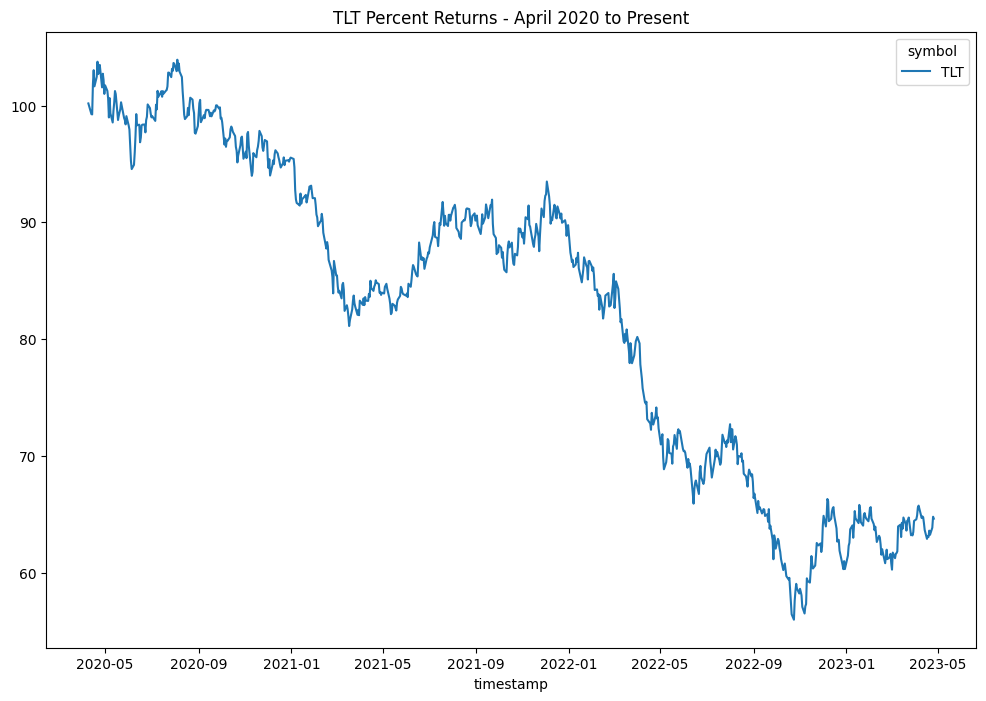

In [65]:
# Plot performance in percentage terms and save to Images
(TLT_cumprod*100).plot(figsize=(12,8), legend=True, title="TLT Percent Returns - April 2020 to Present");
plt.savefig("Images/TLTPercentReturns.png")

In [66]:
# Creating date variables to use in plot
from datetime import date, timedelta
days_after_xlim_pct = (date.today()+timedelta(days=70)).isoformat()

days_after_stocks_pct = (date.today()+timedelta(days=4)).isoformat()

days_after_btc_pct = (date.today()+timedelta(days=2)).isoformat()

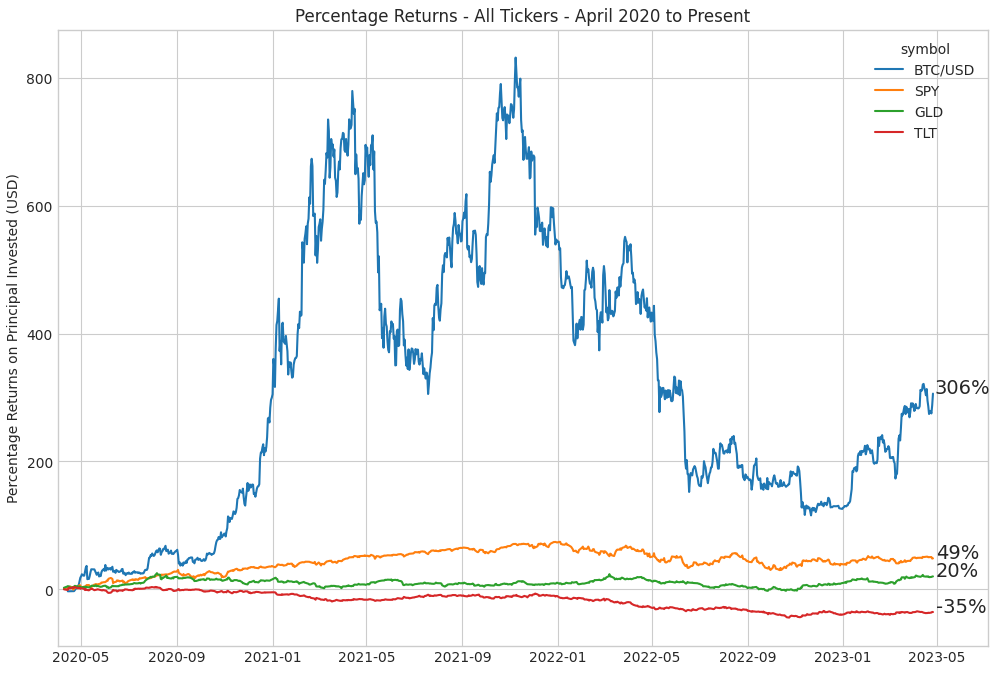

In [67]:
# Overlay of percentage returns 
with plt.style.context('seaborn-whitegrid'):
    ax = ((BTC_cumprod*100)-100).plot(figsize=(12,8), legend=True, title="Percentage Returns - All Tickers - April 2020 to Present")
    ((SPY_cumprod*100)-100).plot(ax=ax, legend=True)
    ((GLD_cumprod*100)-100).plot(ax=ax, legend=True)
    ((TLT_cumprod*100)-100).plot(ax=ax, legend=True)
    ax.text(days_after_stocks_pct, TLT_prod_annotation-100, f"{TLT_prod_annotation-100}%", size=14)
    ax.text(days_after_stocks_pct, GLD_prod_annotation-100, f"{GLD_prod_annotation-100}%", size=14)
    ax.text(days_after_stocks_pct, SPY_prod_annotation-100, f"{SPY_prod_annotation-100}%", size=14)
    ax.text(days_after_btc_pct, BTC_prod_annotation-100, f"{BTC_prod_annotation-100}%", size=14)
    ax.set(ylabel='Percentage Returns on Principal Invested (USD)',
           xlabel=' ')
    ax.set_xlim('2020-04', days_after_xlim_pct)
#     plt.legend(loc=(.93,.8625))
    plt.savefig("Images/OverlayPercentageReturns.png");

In [68]:
# Rechecking info
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084 entries, 0 to 1083
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1084 non-null   object 
 1   timestamp    1084 non-null   object 
 2   open         1084 non-null   float64
 3   high         1084 non-null   float64
 4   low          1084 non-null   float64
 5   close        1084 non-null   float64
 6   volume       1084 non-null   float64
 7   trade_count  1084 non-null   float64
 8   vwap         1084 non-null   float64
dtypes: float64(7), object(2)
memory usage: 76.3+ KB


In [69]:
# Shifting timestamp back to datetime to filter on month start dates
btc_df['timestamp'] = pd.to_datetime(btc_df['timestamp'])
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084 entries, 0 to 1083
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   symbol       1084 non-null   object        
 1   timestamp    1084 non-null   datetime64[ns]
 2   open         1084 non-null   float64       
 3   high         1084 non-null   float64       
 4   low          1084 non-null   float64       
 5   close        1084 non-null   float64       
 6   volume       1084 non-null   float64       
 7   trade_count  1084 non-null   float64       
 8   vwap         1084 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 76.3+ KB


In [70]:
# Filtering for month start dates
btc_monthly = btc_df[btc_df['timestamp'].dt.is_month_start] 
btc_monthly.head()

symbol  timestamp     open     high      low    close  volume  \
5    BTC/USD 2020-05-01   8826.5   8834.0   8716.0   8816.5  0.3007   
29   BTC/USD 2020-06-01   9568.5  10393.0   9515.0  10106.5  5.9507   
59   BTC/USD 2020-07-01   9129.5   9270.0   9129.5   9240.5  5.4679   
90   BTC/USD 2020-08-01  11619.5  12035.0  10594.5  11221.5  0.6674   
116  BTC/USD 2020-09-01  11805.5  12005.5  11805.5  11847.5  0.4049   

     trade_count          vwap  
5            4.0   8830.673595  
29          34.0   9979.759012  
59          59.0   9230.826688  
90          24.0  11656.094171  
116          9.0  11947.180168

In [71]:
# Grabbing subset of timestamp and closing prices 
btc_subset = btc_monthly[['timestamp', 'close']]
btc_subset.head()

timestamp    close
5   2020-05-01   8816.5
29  2020-06-01  10106.5
59  2020-07-01   9240.5
90  2020-08-01  11221.5
116 2020-09-01  11847.5

In [72]:
# Resetting index
btc_reset = btc_subset.reset_index(drop=True)
btc_reset.head()

timestamp    close
0 2020-05-01   8816.5
1 2020-06-01  10106.5
2 2020-07-01   9240.5
3 2020-08-01  11221.5
4 2020-09-01  11847.5

In [73]:
# Setting timestamp column to index to prep for pct_change
btc_index = btc_reset.set_index('timestamp')
btc_index.head()

close
timestamp          
2020-05-01   8816.5
2020-06-01  10106.5
2020-07-01   9240.5
2020-08-01  11221.5
2020-09-01  11847.5

In [74]:
# Calculating month over month pct change
btc_chg = btc_index.pct_change()
btc_chg.head()

close
timestamp           
2020-05-01       NaN
2020-06-01  0.146317
2020-07-01 -0.085687
2020-08-01  0.214382
2020-09-01  0.055786

In [75]:
# Rechecking info
btc_chg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2020-05-01 to 2023-04-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   35 non-null     float64
dtypes: float64(1)
memory usage: 576.0 bytes


In [76]:
# Convert index back to string to prep for plotting
btc_chg.index = btc_chg.index.strftime("%Y-%m-%d")
btc_chg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 2020-05-01 to 2023-04-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   35 non-null     float64
dtypes: float64(1)
memory usage: 576.0+ bytes


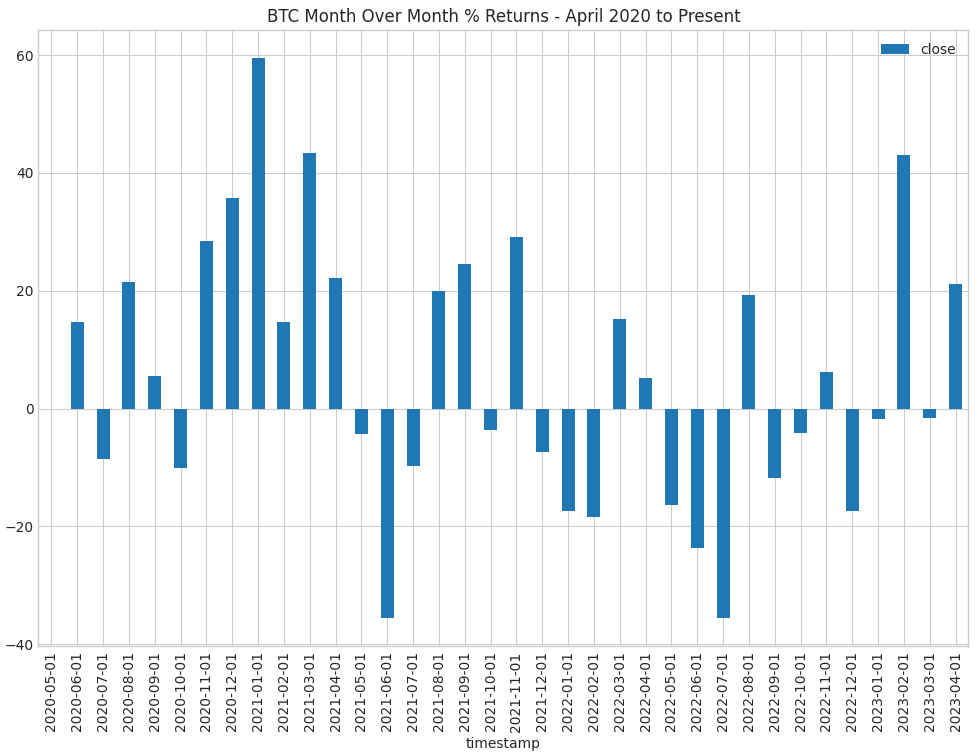

In [77]:
# Plot performance in month over month percentage change and save to Images
with plt.style.context('seaborn-whitegrid'):
    (btc_chg*100).plot(kind='bar', figsize=(12,8), legend=True, title="BTC Month Over Month % Returns - April 2020 to Present");
    plt.savefig("Images/BTCMonthlyPercentReturns.png")

In [78]:
# Prep SPY dataframe
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       2304 non-null   object 
 1   timestamp    2304 non-null   object 
 2   open         2304 non-null   float64
 3   high         2304 non-null   float64
 4   low          2304 non-null   float64
 5   close        2304 non-null   float64
 6   volume       2304 non-null   float64
 7   trade_count  2304 non-null   float64
 8   vwap         2304 non-null   float64
dtypes: float64(7), object(2)
memory usage: 162.1+ KB


In [79]:
# Shifting timestamp back to datetime to filter on month start dates
stock_df['timestamp'] = pd.to_datetime(stock_df['timestamp'])
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   symbol       2304 non-null   object        
 1   timestamp    2304 non-null   datetime64[ns]
 2   open         2304 non-null   float64       
 3   high         2304 non-null   float64       
 4   low          2304 non-null   float64       
 5   close        2304 non-null   float64       
 6   volume       2304 non-null   float64       
 7   trade_count  2304 non-null   float64       
 8   vwap         2304 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 162.1+ KB


In [80]:
stock_df

symbol  timestamp    open      high       low   close      volume  \
0       GLD 2020-04-08  155.91  155.9400  154.5900  154.65   7600804.0   
1       GLD 2020-04-09  158.08  159.0800  157.2100  158.58  18123039.0   
2       GLD 2020-04-13  159.17  162.3800  158.6250  161.41  20549213.0   
3       GLD 2020-04-14  162.73  164.4200  161.7800  162.66  17095086.0   
4       GLD 2020-04-15  161.80  162.5400  160.8061  162.00  12141890.0   
...     ...        ...     ...       ...       ...     ...         ...   
2299    TLT 2023-04-20  104.83  105.2800  104.7530  104.99  16449259.0   
2300    TLT 2023-04-21  105.31  105.4600  104.2700  104.40  14042699.0   
2301    TLT 2023-04-24  104.96  105.4875  104.8400  105.41  17033892.0   
2302    TLT 2023-04-25  106.33  107.1300  106.2800  106.96  21778396.0   
2303    TLT 2023-04-26  106.79  106.8300  106.6600  106.68    992869.0   

      trade_count        vwap  
0         60704.0  155.233884  
1        140239.0  158.255634  
2        140401.0  160.906373  
3        146336.0  163.197557  
4         95518.0  161.749049  
...           ...         ...  
2299      87343.0  104.942524  
2300      92745.0  104.567245  
2301      83333.0  105.290744  
2302     140118.0  106.836514  
2303       7292.0  106.685309  

[2304 rows x 9 columns]

In [81]:
stock_index = stock_df.set_index('timestamp')
stock_index

symbol    open      high       low   close      volume  \
timestamp                                                           
2020-04-08    GLD  155.91  155.9400  154.5900  154.65   7600804.0   
2020-04-09    GLD  158.08  159.0800  157.2100  158.58  18123039.0   
2020-04-13    GLD  159.17  162.3800  158.6250  161.41  20549213.0   
2020-04-14    GLD  162.73  164.4200  161.7800  162.66  17095086.0   
2020-04-15    GLD  161.80  162.5400  160.8061  162.00  12141890.0   
...           ...     ...       ...       ...     ...         ...   
2023-04-20    TLT  104.83  105.2800  104.7530  104.99  16449259.0   
2023-04-21    TLT  105.31  105.4600  104.2700  104.40  14042699.0   
2023-04-24    TLT  104.96  105.4875  104.8400  105.41  17033892.0   
2023-04-25    TLT  106.33  107.1300  106.2800  106.96  21778396.0   
2023-04-26    TLT  106.79  106.8300  106.6600  106.68    992869.0   

            trade_count        vwap  
timestamp                            
2020-04-08      60704.0  155.233884  
2020-04-09     140239.0  158.255634  
2020-04-13     140401.0  160.906373  
2020-04-14     146336.0  163.197557  
2020-04-15      95518.0  161.749049  
...                 ...         ...  
2023-04-20      87343.0  104.942524  
2023-04-21      92745.0  104.567245  
2023-04-24      83333.0  105.290744  
2023-04-25     140118.0  106.836514  
2023-04-26       7292.0  106.685309  

[2304 rows x 8 columns]

In [82]:
stock_index['2021-06-30':'2021-07-02']

symbol    open     high       low   close      volume  trade_count  \
timestamp                                                                       
2021-06-30    GLD  164.57  166.100  164.2900  165.63   7954916.0      55215.0   
2021-07-01    GLD  166.65  166.880  165.5000  166.20   7427387.0      50788.0   
2021-07-02    GLD  167.35  167.715  166.4000  167.29   7872766.0      52311.0   
2021-06-30    SPY  427.21  428.780  427.1800  428.06  64702769.0     315392.0   
2021-07-01    SPY  428.87  430.600  428.8000  430.43  52968992.0     315119.0   
2021-07-02    SPY  431.67  434.100  430.5218  433.72  57503965.0     312260.0   
2021-06-30    TLT  144.25  144.930  144.0700  144.35  15707427.0      76777.0   
2021-07-01    TLT  143.98  144.310  143.5300  144.17  10767196.0      55429.0   
2021-07-02    TLT  144.23  145.040  144.1100  145.04   9648629.0      52006.0   

                  vwap  
timestamp               
2021-06-30  165.379047  
2021-07-01  166.141960  
2021-07-02  167.181069  
2021-06-30  428.035998  
2021-07-01  429.721484  
2021-07-02  432.842859  
2021-06-30  144.486788  
2021-07-01  143.845345  
2021-07-02  144.737576

In [83]:
# Grouping GLD by business month start; nth isolates by symbol
gld_group_df = stock_index.groupby(pd.Grouper(freq='BMS')).nth(0)
gld_group_df.head()

symbol      open    high     low   close      volume  trade_count  \
timestamp                                                                      
2020-04-01    GLD  155.9100  155.94  154.59  154.65   7600804.0      60704.0   
2020-05-01    GLD  157.9500  160.45  157.80  159.78  10914334.0      87024.0   
2020-06-01    GLD  162.9235  163.74  162.39  163.66   8155048.0      60202.0   
2020-07-01    GLD  167.0500  167.06  165.34  166.62  13214759.0      86821.0   
2020-08-03    GLD  185.0500  185.82  184.20  185.64  12896999.0      93696.0   

                  vwap  
timestamp               
2020-04-01  155.233884  
2020-05-01  159.380639  
2020-06-01  163.323352  
2020-07-01  166.229189  
2020-08-03  185.228945

In [84]:
# Filtering first and last months due to incomplete data
gld_iloc = gld_group_df.iloc[1:-1]
gld_iloc.head()

symbol      open    high     low   close      volume  trade_count  \
timestamp                                                                      
2020-05-01    GLD  157.9500  160.45  157.80  159.78  10914334.0      87024.0   
2020-06-01    GLD  162.9235  163.74  162.39  163.66   8155048.0      60202.0   
2020-07-01    GLD  167.0500  167.06  165.34  166.62  13214759.0      86821.0   
2020-08-03    GLD  185.0500  185.82  184.20  185.64  12896999.0      93696.0   
2020-09-01    GLD  186.9900  186.99  184.33  185.05  10689058.0      75982.0   

                  vwap  
timestamp               
2020-05-01  159.380639  
2020-06-01  163.323352  
2020-07-01  166.229189  
2020-08-03  185.228945  
2020-09-01  185.384520

In [85]:
# Grouping SPY by business month start; nth isolates by symbol
spy_group_df = stock_index.groupby(pd.Grouper(freq='BMS')).nth(1)
spy_group_df.head()

symbol    open      high       low   close       volume  \
timestamp                                                            
2020-04-01    SPY  267.96  276.0000  265.2542  274.00  153774487.0   
2020-05-01    SPY  285.31  290.6572  281.5200  282.83  125180028.0   
2020-06-01    SPY  303.62  306.2050  303.0600  305.45   56679836.0   
2020-07-01    SPY  309.54  311.8900  309.0700  310.57   72474858.0   
2020-08-03    SPY  328.32  329.6200  327.7300  328.67   53078112.0   

            trade_count        vwap  
timestamp                            
2020-04-01     950859.0  271.051454  
2020-05-01     639987.0  284.092832  
2020-06-01     316834.0  305.036356  
2020-07-01     418495.0  310.486119  
2020-08-03     288003.0  328.658795

In [86]:
# Filtering first and last months due to incomplete data
spy_iloc = spy_group_df.iloc[1:-1]
spy_iloc.head()

symbol    open      high     low   close       volume  trade_count  \
timestamp                                                                       
2020-05-01    SPY  285.31  290.6572  281.52  282.83  125180028.0     639987.0   
2020-06-01    SPY  303.62  306.2050  303.06  305.45   56679836.0     316834.0   
2020-07-01    SPY  309.54  311.8900  309.07  310.57   72474858.0     418495.0   
2020-08-03    SPY  328.32  329.6200  327.73  328.67   53078112.0     288003.0   
2020-09-01    SPY  350.21  352.7100  349.24  352.68   54999325.0     295183.0   

                  vwap  
timestamp               
2020-05-01  284.092832  
2020-06-01  305.036356  
2020-07-01  310.486119  
2020-08-03  328.658795  
2020-09-01  351.086724

In [87]:
# Grouping TLT by business month start; nth isolates by symbol
tlt_group_df = stock_index.groupby(pd.Grouper(freq='BMS')).nth(2)
tlt_group_df.head()

symbol    open    high     low   close      volume  trade_count  \
timestamp                                                                    
2020-04-01    TLT  165.11  166.19  164.13  165.09  10147077.0      63686.0   
2020-05-01    TLT  167.50  168.11  166.44  167.95  10209421.0      52918.0   
2020-06-01    TLT  162.10  162.44  161.67  162.28  13353301.0      54793.0   
2020-07-01    TLT  162.81  163.56  162.15  163.42  13181262.0      66576.0   
2020-08-03    TLT  169.24  169.99  168.97  169.95   9067756.0      61181.0   

                  vwap  
timestamp               
2020-04-01  165.217491  
2020-05-01  167.362331  
2020-06-01  162.363115  
2020-07-01  163.014043  
2020-08-03  169.514329

In [88]:
# Filtering first and last months due to incomplete data
tlt_iloc = tlt_group_df.iloc[1:-1]
tlt_iloc.head()

symbol    open    high     low   close      volume  trade_count  \
timestamp                                                                    
2020-05-01    TLT  167.50  168.11  166.44  167.95  10209421.0      52918.0   
2020-06-01    TLT  162.10  162.44  161.67  162.28  13353301.0      54793.0   
2020-07-01    TLT  162.81  163.56  162.15  163.42  13181262.0      66576.0   
2020-08-03    TLT  169.24  169.99  168.97  169.95   9067756.0      61181.0   
2020-09-01    TLT  161.76  164.07  161.18  163.86  10587634.0      58232.0   

                  vwap  
timestamp               
2020-05-01  167.362331  
2020-06-01  162.363115  
2020-07-01  163.014043  
2020-08-03  169.514329  
2020-09-01  163.138871

In [89]:
# Revising column names to prep for join
dict = {'close':'tlt_close'}

tlt_iloc = tlt_iloc.rename(columns=dict)


spy_dict = {'close':'spy_close'}

spy_iloc = spy_iloc.rename(columns=spy_dict)


gld_dict = {'close':'gld_close'}

gld_iloc = gld_iloc.rename(columns=gld_dict)
gld_iloc



symbol      open      high       low  gld_close      volume  \
timestamp                                                                
2020-05-01    GLD  157.9500  160.4500  157.8000     159.78  10914334.0   
2020-06-01    GLD  162.9235  163.7400  162.3900     163.66   8155048.0   
2020-07-01    GLD  167.0500  167.0600  165.3400     166.62  13214759.0   
2020-08-03    GLD  185.0500  185.8200  184.2000     185.64  12896999.0   
2020-09-01    GLD  186.9900  186.9900  184.3300     185.05  10689058.0   
2020-10-01    GLD  178.7100  179.5000  178.0375     178.70  10380333.0   
2020-11-02    GLD  177.4499  177.9250  177.1301     177.91   6498368.0   
2020-12-01    GLD  169.7600  170.4800  169.3000     170.19  13555209.0   
2021-01-01    GLD  181.9700  182.4000  180.9550     182.32  14308436.0   
2021-02-01    GLD  175.0200  175.2600  174.0600     174.23   9235082.0   
2021-03-01    GLD  163.0300  163.3500  161.1600     161.53  13828347.0   
2021-04-01    GLD  161.5600  162.1100  161.2800     161.98   7104695.0   
2021-05-03    GLD  167.6100  168.4300  167.4100     167.81   9013396.0   
2021-06-01    GLD  178.7600  178.8500  177.1900     177.90   9143250.0   
2021-07-01    GLD  166.6500  166.8800  165.5000     166.20   7427387.0   
2021-08-02    GLD  169.3300  170.2450  169.1000     169.61  10766410.0   
2021-09-01    GLD  169.9400  170.0000  169.1600     169.70   4752563.0   
2021-10-01    GLD  164.2700  164.9600  163.8850     164.59   6649876.0   
2021-11-01    GLD  167.3800  167.8400  166.9100     167.52   4969004.0   
2021-12-01    GLD  166.8400  167.4700  166.0600     166.16   7820795.0   
2022-01-03    GLD  168.8600  169.0100  168.0000     168.33   9014203.0   
2022-02-01    GLD  168.5700  168.8500  167.8700     168.23   9756471.0   
2022-03-01    GLD  179.0456  181.7600  179.0300     181.62  21859243.0   
2022-04-01    GLD  179.5501  180.4599  178.9800     179.50  13027125.0   
2022-05-02    GLD  173.6121  174.6500  172.9850     173.63  14237636.0   
2022-06-01    GLD  172.2099  172.5300  171.3900     172.23   6938929.0   
2022-07-01    GLD  167.1300  168.6800  166.9600     168.32  11377331.0   
2022-08-01    GLD  164.9800  165.4100  164.4100     165.03   4660218.0   
2022-09-01    GLD  158.1700  158.3900  157.3200     157.87   7384400.0   
2022-10-03    GLD  155.4380  158.4800  155.2300     158.43  10348997.0   
2022-11-01    GLD  153.8200  153.9800  152.8700     153.46   4599737.0   
2022-12-01    GLD  167.4800  167.9500  166.9750     167.84   8232886.0   
2023-01-02    GLD  171.3200  172.0900  170.0200     171.06   7979721.0   
2023-02-01    GLD  179.7500  181.7300  178.6300     181.67   7996342.0   
2023-03-01    GLD  170.9500  171.4900  170.4700     170.76   6590684.0   

            trade_count        vwap  
timestamp                            
2020-05-01      87024.0  159.380639  
2020-06-01      60202.0  163.323352  
2020-07-01      86821.0  166.229189  
2020-08-03      93696.0  185.228945  
2020-09-01      75982.0  185.384520  
2020-10-01      65577.0  178.903733  
2020-11-02      55161.0  177.626697  
2020-12-01      87946.0  169.921532  
2021-01-01     102693.0  181.929522  
2021-02-01      66775.0  174.612395  
2021-03-01     102912.0  162.159329  
2021-04-01      52967.0  161.759341  
2021-05-03      67434.0  167.845715  
2021-06-01      67595.0  178.022479  
2021-07-01      50788.0  166.141960  
2021-08-02      60007.0  169.726678  
2021-09-01      37218.0  169.625454  
2021-10-01      55418.0  164.438331  
2021-11-01      42298.0  167.485529  
2021-12-01      62574.0  166.605337  
2022-01-03      67681.0  168.403580  
2022-02-01      70364.0  168.335275  
2022-03-01     162731.0  180.521167  
2022-04-01      77799.0  179.714366  
2022-05-02     108493.0  173.798444  
2022-06-01      39584.0  172.031163  
2022-07-01      71249.0  167.938735  
2022-08-01      33304.0  164.970363  
2022-09-01      56371.0  157.944854  
2022-10-03      69080.0  157.230698  
2022-11-01      39133.0  153.392860  
2022-12-01      59

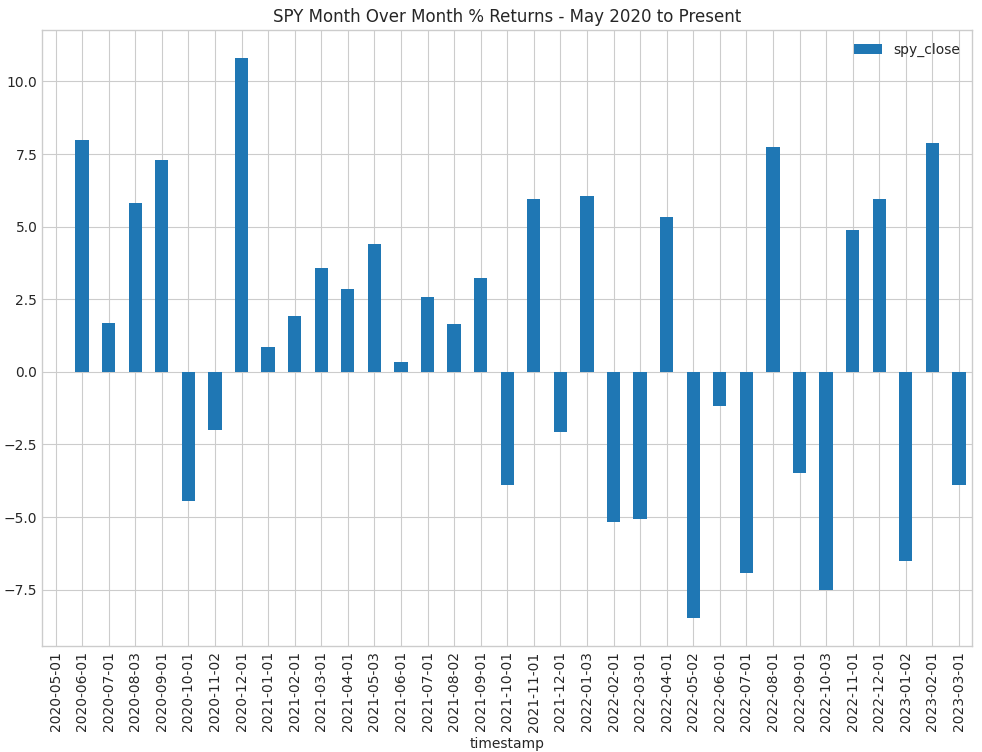

In [90]:
# Grabbing subset of SPY timestamp and closing prices 
spy_close = spy_iloc['spy_close']
spy_close

# Calculating pct change
spy_pct = spy_close.pct_change()

# Convert index back to string to prep for plotting
spy_pct.index = spy_pct.index.strftime("%Y-%m-%d")

# Plot performance in month over month percentage change and save to Images
with plt.style.context('seaborn-whitegrid'):
    (spy_pct*100).plot(kind='bar', figsize=(12,8), legend=True, title="SPY Month Over Month % Returns - May 2020 to Present");
    plt.savefig("Images/SPYMonthlyPercentReturns.png")

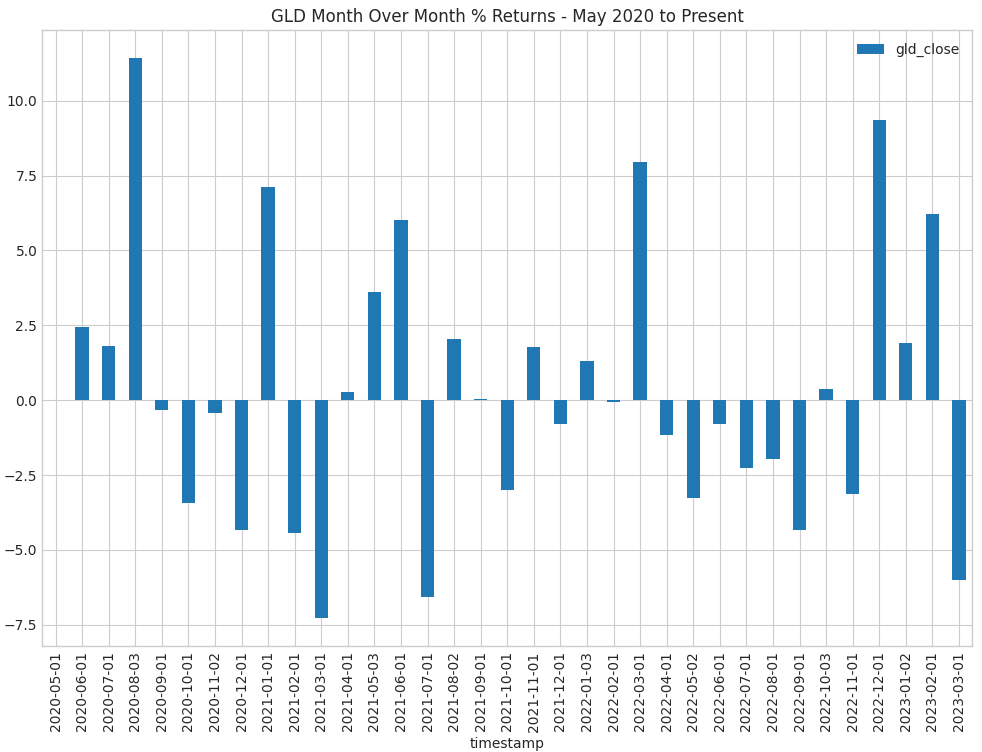

In [91]:
# Grabbing subset of GLD timestamp and closing prices 
gld_close = gld_iloc['gld_close']

# Calculating pct change
gld_pct = gld_close.pct_change()

# Convert index back to string to prep for plotting
gld_pct.index = gld_pct.index.strftime("%Y-%m-%d")

# Plot performance in month over month percentage change and save to Images
with plt.style.context('seaborn-whitegrid'):
    (gld_pct*100).plot(kind='bar', figsize=(12,8), legend=True, title="GLD Month Over Month % Returns - May 2020 to Present");
    plt.savefig("Images/GLDMonthlyPercentReturns.png")

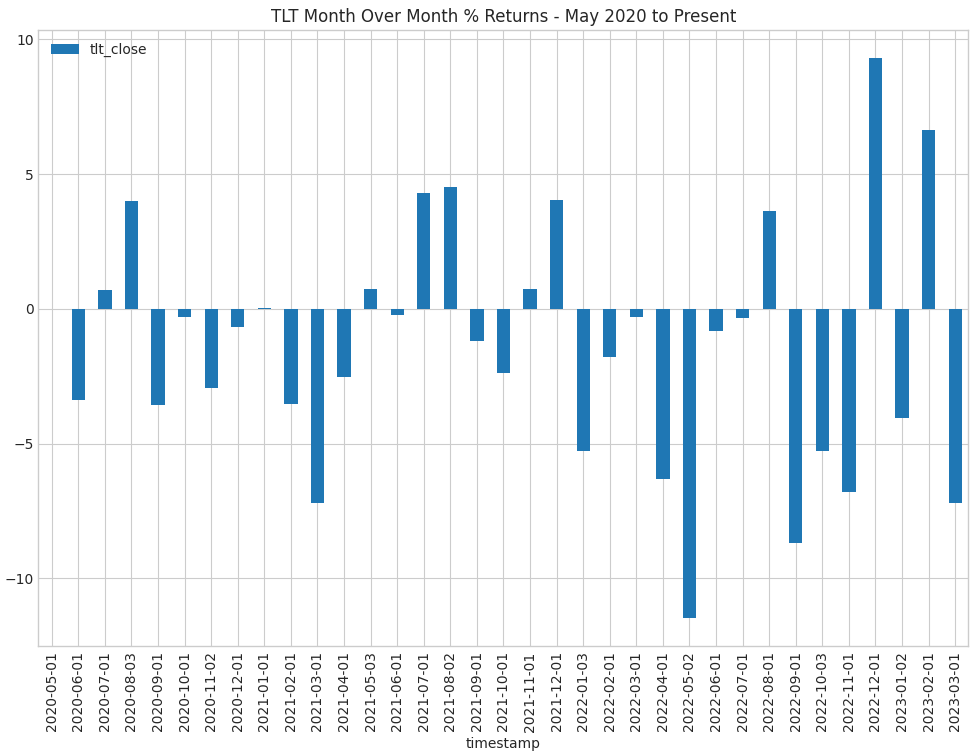

In [92]:
# Grabbing subset of TLT timestamp and closing prices 
tlt_close = tlt_iloc['tlt_close']

# Calculating pct change
tlt_pct = tlt_close.pct_change()

# Convert index back to string to prep for plotting
tlt_pct.index = tlt_pct.index.strftime("%Y-%m-%d")

# Plot performance in month over month percentage change and save to Images
with plt.style.context('seaborn-whitegrid'):
    (tlt_pct*100).plot(kind='bar', figsize=(12,8), legend=True, title="TLT Month Over Month % Returns - May 2020 to Present");
    plt.savefig("Images/TLTMonthlyPercentReturns.png")

In [93]:
btc_chg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 2020-05-01 to 2023-04-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   35 non-null     float64
dtypes: float64(1)
memory usage: 576.0+ bytes


In [94]:
tlt_pct.info()

<class 'pandas.core.series.Series'>
Index: 35 entries, 2020-05-01 to 2023-03-01
Series name: tlt_close
Non-Null Count  Dtype  
--------------  -----  
34 non-null     float64
dtypes: float64(1)
memory usage: 560.0+ bytes


In [95]:
spy_pct.shape

(35,)

In [96]:
gld_pct.shape

(35,)

In [97]:
df_concat = pd.concat([tlt_pct, spy_pct, gld_pct], axis=1)
df_concat

tlt_close  spy_close  gld_close
timestamp                                  
2020-05-01        NaN        NaN        NaN
2020-06-01  -0.033760   0.079977   0.024283
2020-07-01   0.007025   0.016762   0.018086
2020-08-03   0.039958   0.058280   0.114152
2020-09-01  -0.035834   0.073052  -0.003178
2020-10-01  -0.003051  -0.044545  -0.034315
2020-11-02  -0.029261  -0.020120  -0.004421
2020-12-01  -0.006810   0.107968  -0.043393
2021-01-01   0.000254   0.008556   0.071273
2021-02-01  -0.035166   0.019107  -0.044373
2021-03-01  -0.071974   0.035663  -0.072892
2021-04-01  -0.025167   0.028709   0.002786
2021-05-03   0.007345   0.043908   0.035992
2021-06-01  -0.002238   0.003515   0.060128
2021-07-01   0.043123   0.025639  -0.065767
2021-08-02   0.045086   0.016635   0.020517
2021-09-01  -0.011814   0.032473   0.000531
2021-10-01  -0.023776  -0.038867  -0.030112
2021-11-01   0.007499   0.059414   0.017802
2021-12-01   0.040290  -0.020737  -0.008118
2022-01-03  -0.052777   0.060400   0.013060
2022-02-01  -0.017879  -0.051831  -0.000594
2022-03-01  -0.002964  -0.050712   0.079593
2022-04-01  -0.063128   0.053351  -0.011673
2022-05-02  -0.114821  -0.084872  -0.032702
2022-06-01  -0.008193  -0.011798  -0.008063
2022-07-01  -0.003442  -0.069216  -0.022702
2022-08-01   0.036436   0.077458  -0.019546
2022-09-01  -0.086971  -0.034934  -0.043386
2022-10-03  -0.052646  -0.075198   0.003547
2022-11-01  -0.067996   0.048853  -0.031370
2022-12-01   0.092901   0.059451   0.093705
2023-01-02  -0.040658  -0.065197   0.019185
2023-02-01   0.066233   0.078725   0.062025
2023-03-01  -0.072194  -0.039094  -0.060054

In [98]:
btc_chg.shape

(36, 1)

In [99]:
btc_re = btc_chg.iloc[0:-1]
btc_re

close
timestamp           
2020-05-01       NaN
2020-06-01  0.146317
2020-07-01 -0.085687
2020-08-01  0.214382
2020-09-01  0.055786
2020-10-01 -0.100696
2020-11-01  0.284715
2020-12-01  0.357868
2021-01-01  0.594222
2021-02-01  0.147177
2021-03-01  0.434132
2021-04-01  0.220784
2021-05-01 -0.042849
2021-06-01 -0.355676
2021-07-01 -0.098060
2021-08-01  0.199408
2021-09-01  0.244711
2021-10-01 -0.037009
2021-11-01  0.291715
2021-12-01 -0.073966
2022-01-01 -0.173802
2022-02-01 -0.183169
2022-03-01  0.152741
2022-04-01  0.051325
2022-05-01 -0.163191
2022-06-01 -0.235826
2022-07-01 -0.355927
2022-08-01  0.192689
2022-09-01 -0.118534
2022-10-01 -0.041121
2022-11-01  0.061301
2022-12-01 -0.174473
2023-01-01 -0.017344
2023-02-01  0.430958
2023-03-01 -0.015211

In [100]:
all_concat = pd.concat([df_concat, btc_re], axis=1)
all_concat

tlt_close  spy_close  gld_close     close
timestamp                                            
2020-05-01        NaN        NaN        NaN       NaN
2020-06-01  -0.033760   0.079977   0.024283  0.146317
2020-07-01   0.007025   0.016762   0.018086 -0.085687
2020-08-03   0.039958   0.058280   0.114152       NaN
2020-09-01  -0.035834   0.073052  -0.003178  0.055786
2020-10-01  -0.003051  -0.044545  -0.034315 -0.100696
2020-11-02  -0.029261  -0.020120  -0.004421       NaN
2020-12-01  -0.006810   0.107968  -0.043393  0.357868
2021-01-01   0.000254   0.008556   0.071273  0.594222
2021-02-01  -0.035166   0.019107  -0.044373  0.147177
2021-03-01  -0.071974   0.035663  -0.072892  0.434132
2021-04-01  -0.025167   0.028709   0.002786  0.220784
2021-05-03   0.007345   0.043908   0.035992       NaN
2021-06-01  -0.002238   0.003515   0.060128 -0.355676
2021-07-01   0.043123   0.025639  -0.065767 -0.098060
2021-08-02   0.045086   0.016635   0.020517       NaN
2021-09-01  -0.011814   0.032473   0.000531  0.244711
2021-10-01  -0.023776  -0.038867  -0.030112 -0.037009
2021-11-01   0.007499   0.059414   0.017802  0.291715
2021-12-01   0.040290  -0.020737  -0.008118 -0.073966
2022-01-03  -0.052777   0.060400   0.013060       NaN
2022-02-01  -0.017879  -0.051831  -0.000594 -0.183169
2022-03-01  -0.002964  -0.050712   0.079593  0.152741
2022-04-01  -0.063128   0.053351  -0.011673  0.051325
2022-05-02  -0.114821  -0.084872  -0.032702       NaN
2022-06-01  -0.008193  -0.011798  -0.008063 -0.235826
2022-07-01  -0.003442  -0.069216  -0.022702 -0.355927
2022-08-01   0.036436   0.077458  -0.019546  0.192689
2022-09-01  -0.086971  -0.034934  -0.043386 -0.118534
2022-10-03  -0.052646  -0.075198   0.003547       NaN
2022-11-01  -0.067996   0.048853  -0.031370  0.061301
2022-12-01   0.092901   0.059451   0.093705 -0.174473
2023-01-02  -0.040658  -0.065197   0.019185       NaN
2023-02-01   0.066233   0.078725   0.062025  0.430958
2023-03-01  -0.072194  -0.039094  -0.060054 -0.015211
2020-08-01        NaN        NaN        NaN  0.214382
2020-11-01        NaN        NaN        NaN  0.284715
2021-05-01        NaN        NaN        NaN -0.042849
2021-08-01        NaN        NaN        NaN  0.199408
2022-01-01        NaN        NaN        NaN -0.173802
2022-05-01        NaN        NaN        NaN -0.163191
2022-10-01        NaN        NaN        NaN -0.041121
2023-01-01        NaN        NaN        NaN -0.017344

In [101]:
# !pip install scipy

The correlation between both factors is 0.15


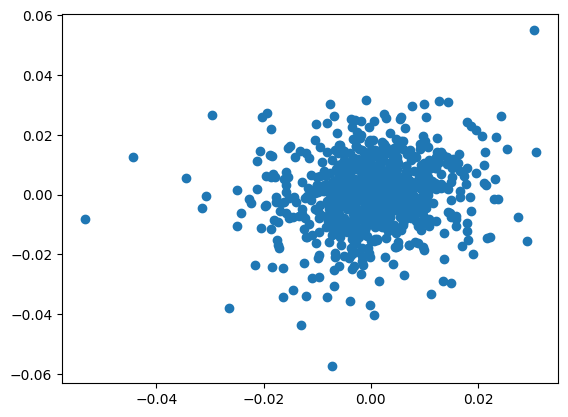

In [102]:
import scipy.stats as st
plt.scatter(gld_daily['GLD'], spy_daily['SPY'])
plt.show
correlation = st.pearsonr(gld_daily['GLD'], spy_daily['SPY'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

In [103]:
correlation

PearsonRResult(statistic=0.14722556107690843, pvalue=4.257336788062458e-05)

The correlation between both factors is -0.07


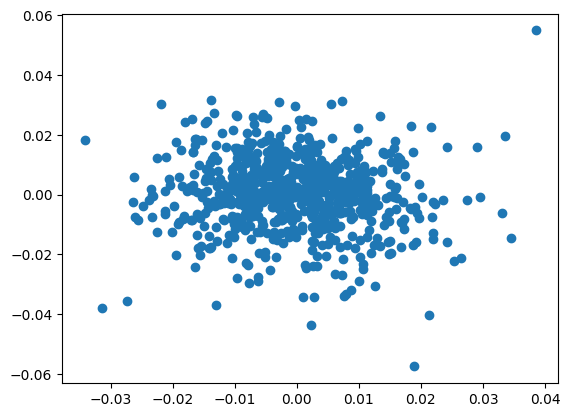

In [104]:
plt.scatter(tlt_daily['TLT'], spy_daily['SPY'])
plt.show
correlation_tlt = st.pearsonr(tlt_daily['TLT'], spy_daily['SPY'])
print(f"The correlation between both factors is {round(correlation_tlt[0],2)}")

In [105]:
correlation_tlt

PearsonRResult(statistic=-0.06892470630355689, pvalue=0.05638995747701801)

The correlation between both factors is 0.28


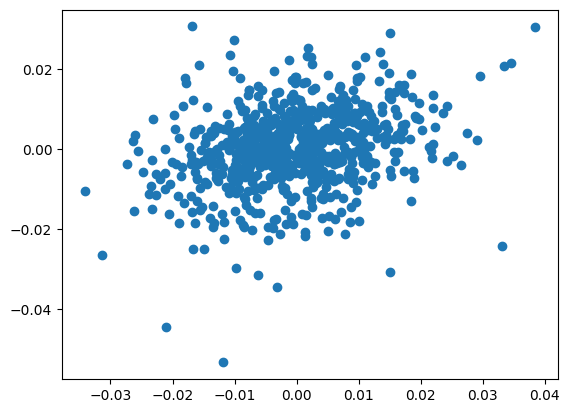

In [106]:
plt.scatter(tlt_daily['TLT'], gld_daily['GLD'])
plt.show
correlation_gld = st.pearsonr(tlt_daily['TLT'], gld_daily['GLD'])
print(f"The correlation between both factors is {round(correlation_gld[0],2)}")

In [107]:
correlation_gld

PearsonRResult(statistic=0.283375593435922, pvalue=1.246521282741932e-15)

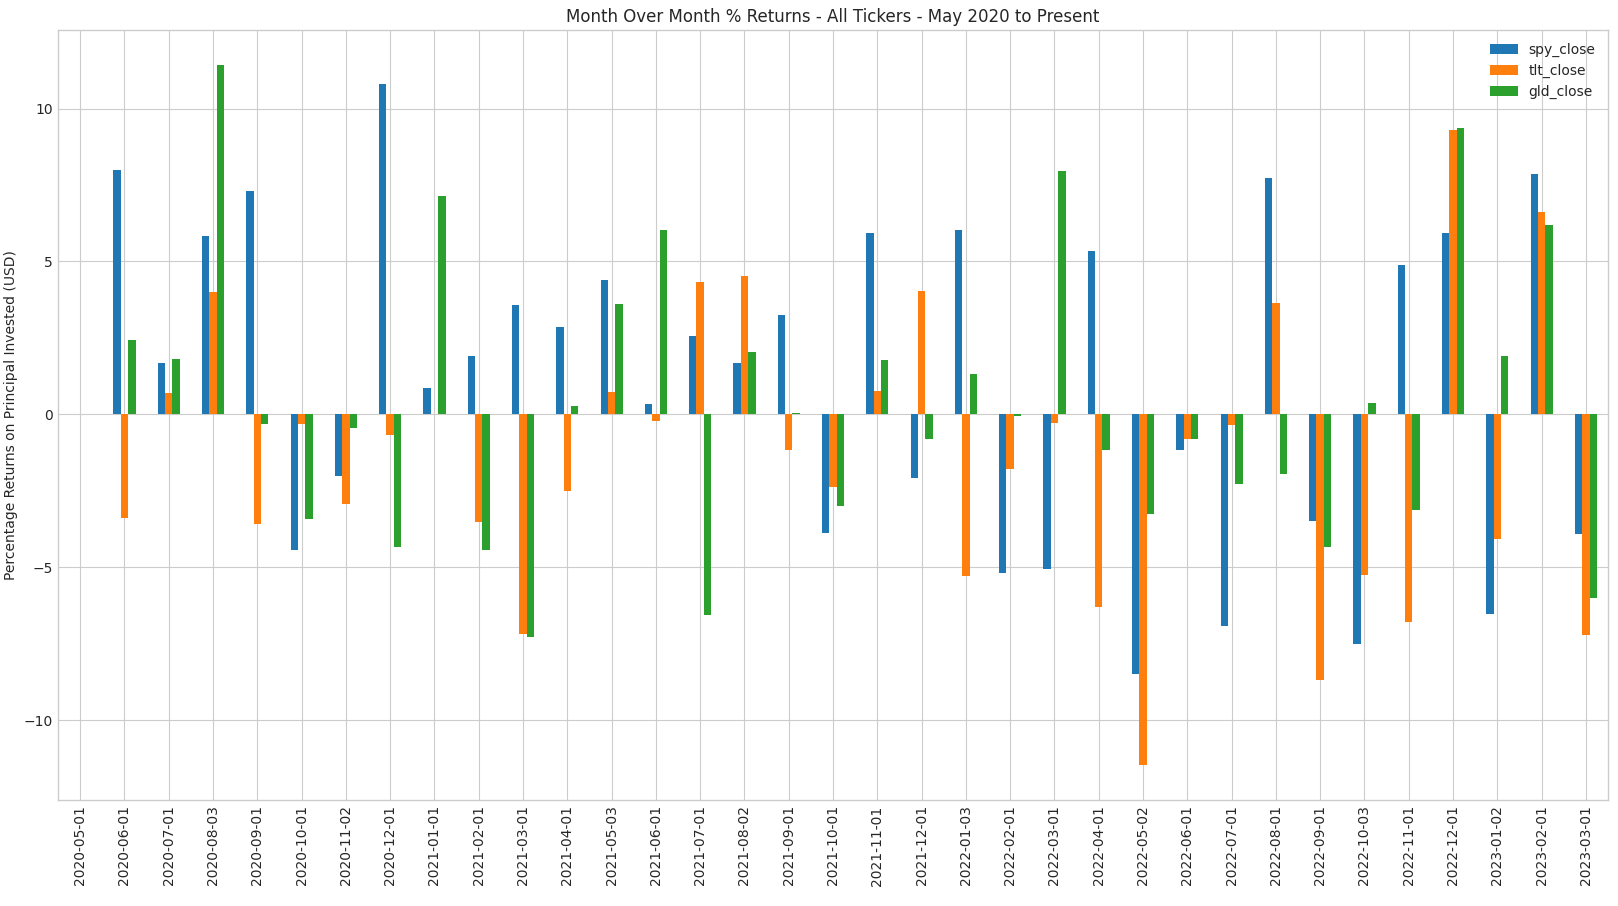

In [108]:
# Overlay of percentage returns 
with plt.style.context('seaborn-whitegrid'):
    ax = (df_concat*100).plot(y=['spy_close','tlt_close','gld_close'], kind='bar', figsize=(20,10), legend=True, title="Month Over Month % Returns - All Tickers - May 2020 to Present");
#     (spy_pct*100).plot(ax=ax, legend=True)
#     (gld_pct*100).plot(ax=ax, legend=True)
#     (tlt_pct*100).plot(ax=ax, legend=True)

    ax.set(ylabel='Percentage Returns on Principal Invested (USD)',
           xlabel=' ')
#     ax.set_xlim('2020-04', days_after_xlim_pct)
#     plt.legend(loc=(.93,.8625))
    plt.savefig("Images/OverlayMoMPercentageReturns.png");

In [109]:
tlt_pct.max()

0.09290069236333576

In [110]:
gld_pct.max()

0.11415196254951376

In [111]:
spy_pct.max()

0.10796813955601303

In [112]:
tlt_pct.min()

-0.11482096993503543

In [113]:
gld_pct.min()

-0.0728921540492452

In [114]:
spy_pct.min()

-0.084871500485737

In [115]:
btc_chg.max()

close    0.594222
dtype: float64

In [116]:
btc_chg.min()

close   -0.355927
dtype: float64

In [117]:
# max_df = pd.DataFrame

In [118]:
# max_df.columns = [['gld_max','spy_max','tlt_max']]
# max_df

In [119]:
# max_df['gld_max'] = gld_pct.max()
# max_df

In [120]:
stock_df

symbol  timestamp    open      high       low   close      volume  \
0       GLD 2020-04-08  155.91  155.9400  154.5900  154.65   7600804.0   
1       GLD 2020-04-09  158.08  159.0800  157.2100  158.58  18123039.0   
2       GLD 2020-04-13  159.17  162.3800  158.6250  161.41  20549213.0   
3       GLD 2020-04-14  162.73  164.4200  161.7800  162.66  17095086.0   
4       GLD 2020-04-15  161.80  162.5400  160.8061  162.00  12141890.0   
...     ...        ...     ...       ...       ...     ...         ...   
2299    TLT 2023-04-20  104.83  105.2800  104.7530  104.99  16449259.0   
2300    TLT 2023-04-21  105.31  105.4600  104.2700  104.40  14042699.0   
2301    TLT 2023-04-24  104.96  105.4875  104.8400  105.41  17033892.0   
2302    TLT 2023-04-25  106.33  107.1300  106.2800  106.96  21778396.0   
2303    TLT 2023-04-26  106.79  106.8300  106.6600  106.68    992869.0   

      trade_count        vwap  
0         60704.0  155.233884  
1        140239.0  158.255634  
2        140401.0  160.906373  
3        146336.0  163.197557  
4         95518.0  161.749049  
...           ...         ...  
2299      87343.0  104.942524  
2300      92745.0  104.567245  
2301      83333.0  105.290744  
2302     140118.0  106.836514  
2303       7292.0  106.685309  

[2304 rows x 9 columns]

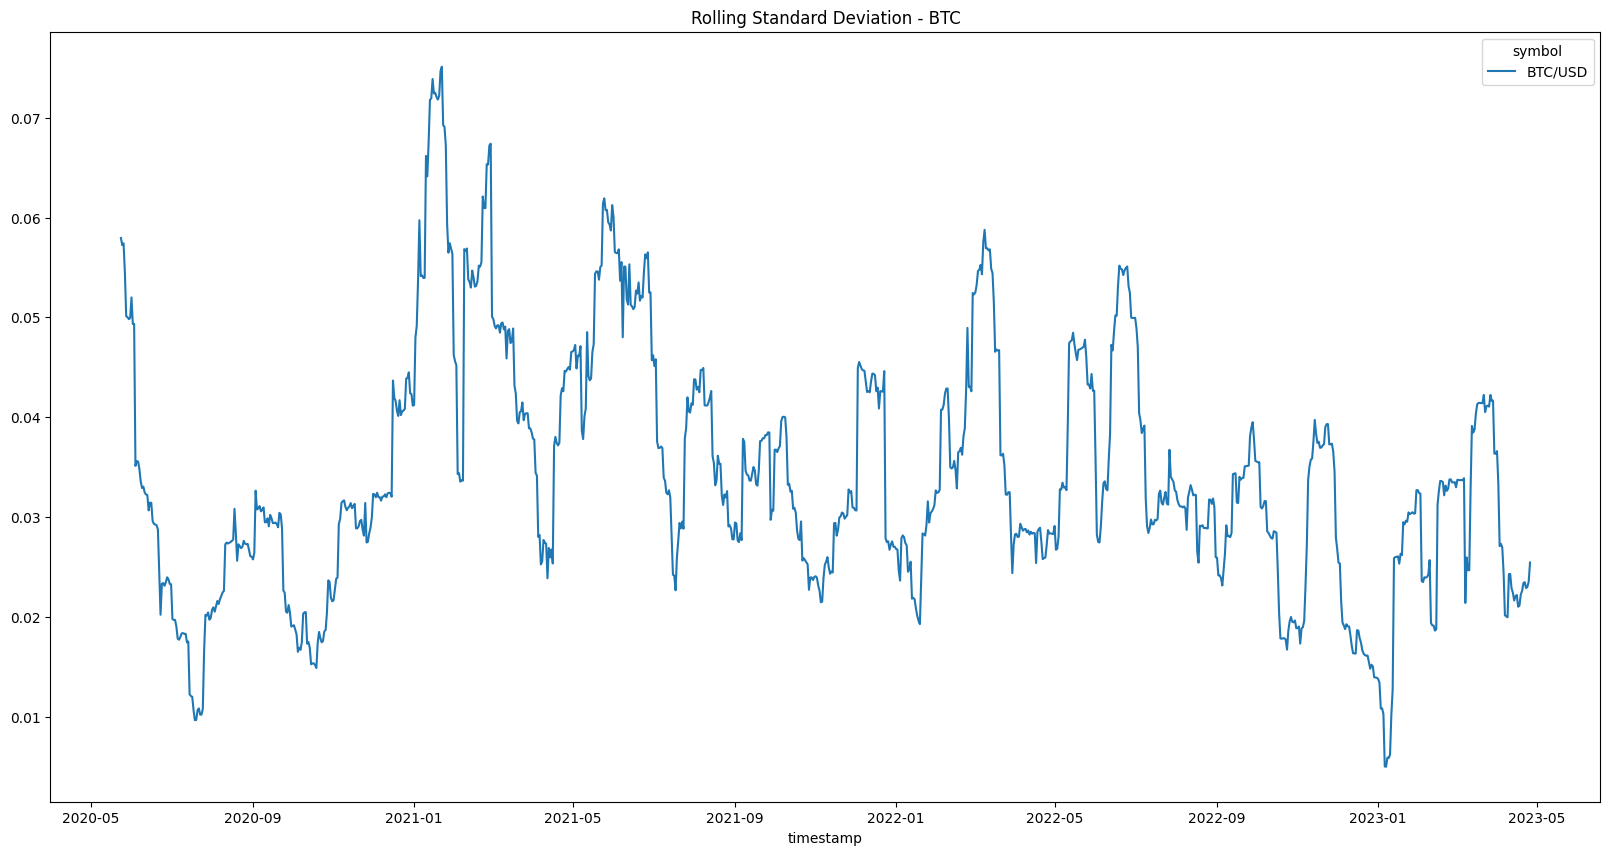

In [121]:
# Calculate the rolling standard deviation for BTC using a 21-day window
btc_rolling = btc_daily.rolling(window=21).std().plot(figsize=(20,10), legend=True, title="Rolling Standard Deviation - BTC")

# Plot the rolling standard deviation
btc_rolling;
plt.savefig("Images/RollingSTD_alpaca.png")

In [122]:
# !pip install yfinance

In [123]:
import yfinance as yf

btc_data = yf.Ticker("BTC-USD")

hist = btc_data.history(period="11y")

hist

Open          High           Low  \
Date                                                                  
2014-09-17 00:00:00+00:00    465.864014    468.174011    452.421997   
2014-09-18 00:00:00+00:00    456.859985    456.859985    413.104004   
2014-09-19 00:00:00+00:00    424.102997    427.834991    384.532013   
2014-09-20 00:00:00+00:00    394.673004    423.295990    389.882996   
2014-09-21 00:00:00+00:00    408.084991    412.425995    393.181000   
...                                 ...           ...           ...   
2023-04-22 00:00:00+00:00  27265.894531  27872.142578  27169.570312   
2023-04-23 00:00:00+00:00  27816.144531  27820.244141  27400.314453   
2023-04-24 00:00:00+00:00  27591.730469  27979.982422  27070.849609   
2023-04-25 00:00:00+00:00  27514.873047  28371.078125  27207.931641   
2023-04-26 00:00:00+00:00  28281.115234  29995.837891  28262.826172   

                                  Close       Volume  Dividends  Stock Splits  
Date                                                                           
2014-09-17 00:00:00+00:00    457.334015     21056800        0.0           0.0  
2014-09-18 00:00:00+00:00    424.440002     34483200        0.0           0.0  
2014-09-19 00:00:00+00:00    394.795990     37919700        0.0           0.0  
2014-09-20 00:00:00+00:00    408.903992     36863600        0.0           0.0  
2014-09-21 00:00:00+00:00    398.821014     26580100        0.0           0.0  
...                                 ...          ...        ...           ...  
2023-04-22 00:00:00+00:00  27817.500000  13125734602        0.0           0.0  
2023-04-23 00:00:00+00:00  27591.384766  12785446832        0.0           0.0  
2023-04-24 00:00:00+00:00  27525.339844  17703288330        0.0           0.0  
2023-04-25 00:00:00+00:00  28307.597656  17733373139        0.0           0.0  
2023-04-26 00:00:00+00:00  29752.787109  24992780288        0.0           0.0  

[3144 rows x 7 columns]

In [124]:
hist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3144 entries, 2014-09-17 00:00:00+00:00 to 2023-04-26 00:00:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3144 non-null   float64
 1   High          3144 non-null   float64
 2   Low           3144 non-null   float64
 3   Close         3144 non-null   float64
 4   Volume        3144 non-null   int64  
 5   Dividends     3144 non-null   float64
 6   Stock Splits  3144 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 196.5 KB


In [125]:
hist_reset = hist.reset_index()
hist_reset

Date          Open          High           Low  \
0    2014-09-17 00:00:00+00:00    465.864014    468.174011    452.421997   
1    2014-09-18 00:00:00+00:00    456.859985    456.859985    413.104004   
2    2014-09-19 00:00:00+00:00    424.102997    427.834991    384.532013   
3    2014-09-20 00:00:00+00:00    394.673004    423.295990    389.882996   
4    2014-09-21 00:00:00+00:00    408.084991    412.425995    393.181000   
...                        ...           ...           ...           ...   
3139 2023-04-22 00:00:00+00:00  27265.894531  27872.142578  27169.570312   
3140 2023-04-23 00:00:00+00:00  27816.144531  27820.244141  27400.314453   
3141 2023-04-24 00:00:00+00:00  27591.730469  27979.982422  27070.849609   
3142 2023-04-25 00:00:00+00:00  27514.873047  28371.078125  27207.931641   
3143 2023-04-26 00:00:00+00:00  28281.115234  29995.837891  28262.826172   

             Close       Volume  Dividends  Stock Splits  
0       457.334015     21056800        0.0           0.0  
1       424.440002     34483200        0.0           0.0  
2       394.795990     37919700        0.0           0.0  
3       408.903992     36863600        0.0           0.0  
4       398.821014     26580100        0.0           0.0  
...            ...          ...        ...           ...  
3139  27817.500000  13125734602        0.0           0.0  
3140  27591.384766  12785446832        0.0           0.0  
3141  27525.339844  17703288330        0.0           0.0  
3142  28307.597656  17733373139        0.0           0.0  
3143  29752.787109  24992780288        0.0           0.0  

[3144 rows x 8 columns]

In [126]:
hist_reset['Date'] = hist_reset['Date'].dt.date
hist_reset.head()

Date        Open        High         Low       Close    Volume  \
0  2014-09-17  465.864014  468.174011  452.421997  457.334015  21056800   
1  2014-09-18  456.859985  456.859985  413.104004  424.440002  34483200   
2  2014-09-19  424.102997  427.834991  384.532013  394.795990  37919700   
3  2014-09-20  394.673004  423.295990  389.882996  408.903992  36863600   
4  2014-09-21  408.084991  412.425995  393.181000  398.821014  26580100   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0

In [127]:
# Grabbing subset of timestamp and closing prices 
btc_sub = hist_reset[['Date', 'Close']].set_index('Date')
btc_sub.head()

Close
Date                  
2014-09-17  457.334015
2014-09-18  424.440002
2014-09-19  394.795990
2014-09-20  408.903992
2014-09-21  398.821014

In [128]:
# Calculating month over month pct change
btc_c = btc_sub.pct_change()
btc_c.head()

Close
Date                
2014-09-17       NaN
2014-09-18 -0.071926
2014-09-19 -0.069843
2014-09-20  0.035735
2014-09-21 -0.024659

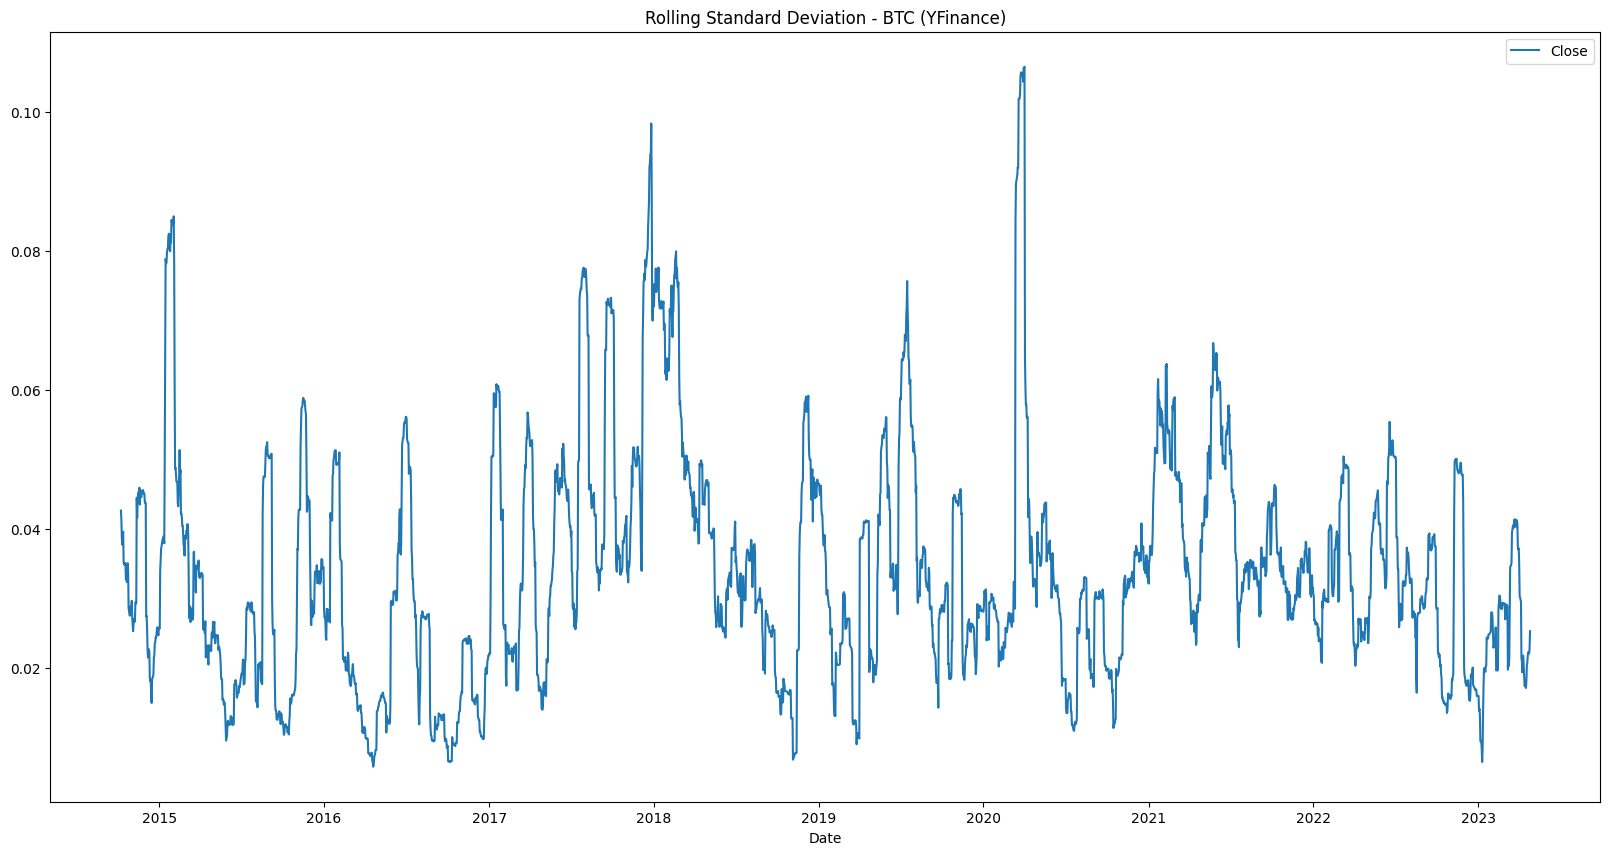

In [129]:
# Calculate the rolling standard deviation for BTC using a 21-day window
btc_roll = btc_c.rolling(window=21).std().plot(figsize=(20,10), legend=True, title="Rolling Standard Deviation - BTC (YFinance)")

# Plot the rolling standard deviation
btc_roll;
plt.savefig("Images/RollingSTD_yfinance.png")

In [130]:
yf_data = yf.download("BTC-USD", start="2011-01-01", end="2012-01-01")
yf_data

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BTC-USD: Data doesn't exist for startDate = 1293840000, endDate = 1325376000


Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []

In [131]:
# !pip install quandl

In [132]:
import quandl


In [133]:
# Save API Key for Quandl to Access
# quandl.save_key("api_key")
# print(quandl.ApiConfig.api_key)

In [134]:
# Import API Key securely
quandl.read_key()

In [135]:
# Grabbing BTC Data from Quandl
data_q = quandl.get('BCHAIN/MKPRU')  # Format is: `DATABASE_CODE/DATASET_CODE`
data_q

Value
Date                
2009-01-02      0.00
2009-01-03      0.00
2009-01-04      0.00
2009-01-05      0.00
2009-01-06      0.00
...              ...
2023-04-22  27267.99
2023-04-23  27816.18
2023-04-24  27590.55
2023-04-25  27516.48
2023-04-26  28301.71

[5228 rows x 1 columns]

In [136]:
data_q.isnull().sum()

Value    0
dtype: int64

In [137]:
# Calculating month over month pct change
btc_q = data_q.pct_change()
btc_q

Value
Date                
2009-01-02       NaN
2009-01-03       NaN
2009-01-04       NaN
2009-01-05       NaN
2009-01-06       NaN
...              ...
2023-04-22 -0.034523
2023-04-23  0.020104
2023-04-24 -0.008111
2023-04-25 -0.002685
2023-04-26  0.028537

[5228 rows x 1 columns]

In [138]:
btc_qna = btc_q.dropna()
btc_qna

Value
Date                
2010-08-16       inf
2010-08-17 -1.000000
2010-08-18       inf
2010-08-19 -0.030523
2010-08-20  0.049475
...              ...
2023-04-22 -0.034523
2023-04-23  0.020104
2023-04-24 -0.008111
2023-04-25 -0.002685
2023-04-26  0.028537

[4637 rows x 1 columns]

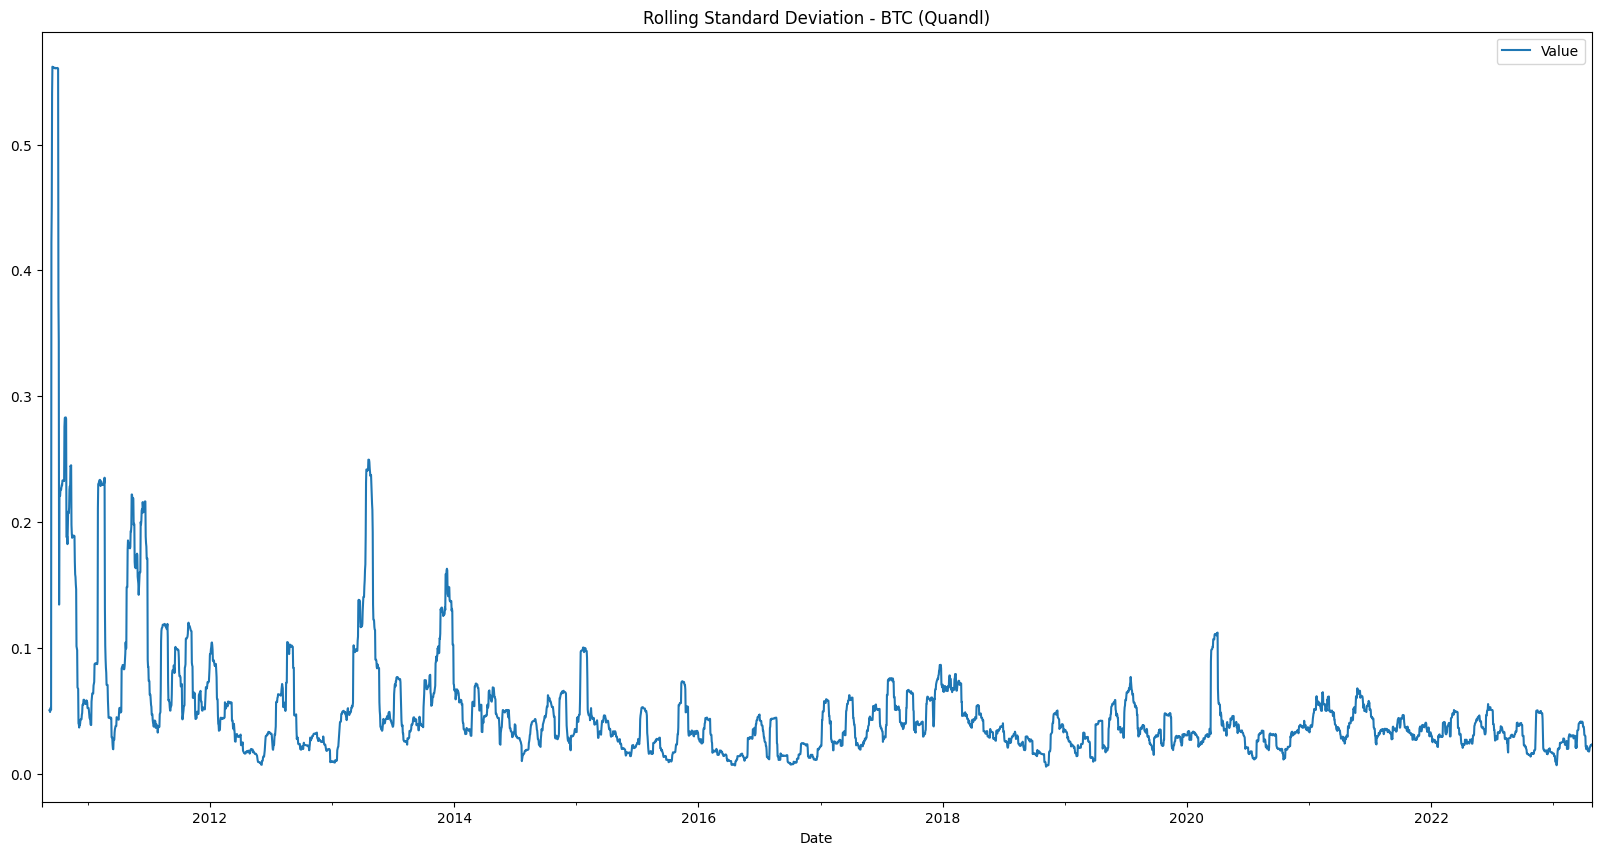

In [139]:
# Calculate the rolling standard deviation for BTC using a 21-day window
btc_rolled = btc_qna.rolling(window=21).std().plot(figsize=(20,10), legend=True, title="Rolling Standard Deviation - BTC (Quandl)")

# Plot the rolling standard deviation
btc_rolled;
plt.savefig("Images/RollingSTD_quandl.png")

In [140]:
data_slice = data_q['2010-09-15':'2023']
data_slice.head()

Value
Date                
2010-09-15  0.061900
2010-09-16  0.150000
2010-09-17  0.060900
2010-09-18  0.062599
2010-09-19  0.060000

In [141]:
# Calculating month over month pct change
btc_cambio = data_slice.pct_change()
btc_cambio.head()

Value
Date                
2010-09-15       NaN
2010-09-16  1.423263
2010-09-17 -0.594000
2010-09-18  0.027898
2010-09-19 -0.041518

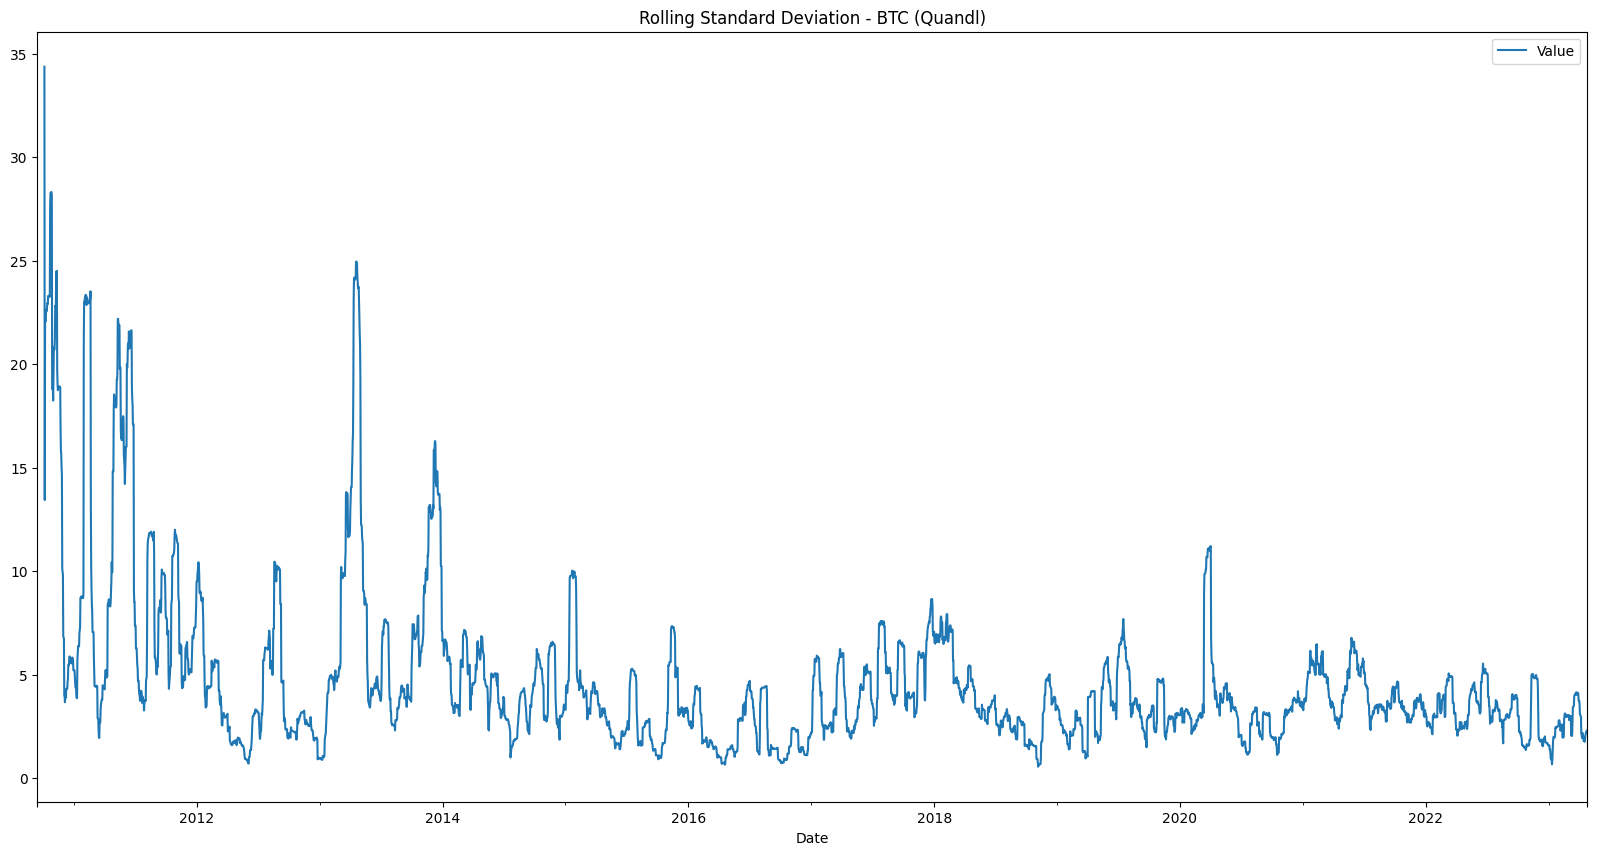

In [142]:
# Calculate the rolling standard deviation for BTC using a 21-day window
btc_rolls = (btc_cambio*100).rolling(window=21).std().plot(figsize=(20,10), legend=True, title="Rolling Standard Deviation - BTC (Quandl)")

# Plot the rolling standard deviation
btc_rolls;
plt.savefig("Images/RollingSTD_quandl_sept.png")

In [143]:
# Grabbing last 30 days
btc_last_30 = btc_df.tail(30)
btc_last_30.head()

symbol  timestamp      open      high       low     close  \
1054  BTC/USD 2023-03-28  26992.83  27622.24  26674.02  27580.86   
1055  BTC/USD 2023-03-29  27580.86  29189.54  27516.03  28594.44   
1056  BTC/USD 2023-03-30  28599.03  28788.12  27719.21  28193.24   
1057  BTC/USD 2023-03-31  28195.37  28824.80  27529.53  28588.44   
1058  BTC/USD 2023-04-01  28588.76  28605.10  28257.82  28404.03   

            volume  trade_count          vwap  
1054  10802.762400     415238.0  27140.698798  
1055  17065.085119     580600.0  28415.669898  
1056  13818.790240     339849.0  28282.496754  
1057  10207.067870     238333.0  28264.484682  
1058   3835.215540      91695.0  28443.351585

In [144]:
# Subset of timestamp and close
btc_30 = btc_last_30[['timestamp','close']]
btc_30.head()

timestamp     close
1054 2023-03-28  27580.86
1055 2023-03-29  28594.44
1056 2023-03-30  28193.24
1057 2023-03-31  28588.44
1058 2023-04-01  28404.03

In [145]:
# Setting timestamp as index
btc_30_index = btc_30.set_index('timestamp')
btc_30_index.head()

close
timestamp           
2023-03-28  27580.86
2023-03-29  28594.44
2023-03-30  28193.24
2023-03-31  28588.44
2023-04-01  28404.03

In [146]:
# Running daily percentage change
btc_last_pct = btc_30_index.pct_change()
btc_last_pct.head()

close
timestamp           
2023-03-28       NaN
2023-03-29  0.036749
2023-03-30 -0.014031
2023-03-31  0.014018
2023-04-01 -0.006451

In [147]:
# Checking info
btc_last_pct.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2023-03-28 to 2023-04-26
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   29 non-null     float64
dtypes: float64(1)
memory usage: 480.0 bytes


In [148]:
# Convert index back to string to prep for plotting
btc_last_pct.index = btc_last_pct.index.strftime("%Y-%m-%d")
btc_last_pct.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 2023-03-28 to 2023-04-26
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   29 non-null     float64
dtypes: float64(1)
memory usage: 480.0+ bytes


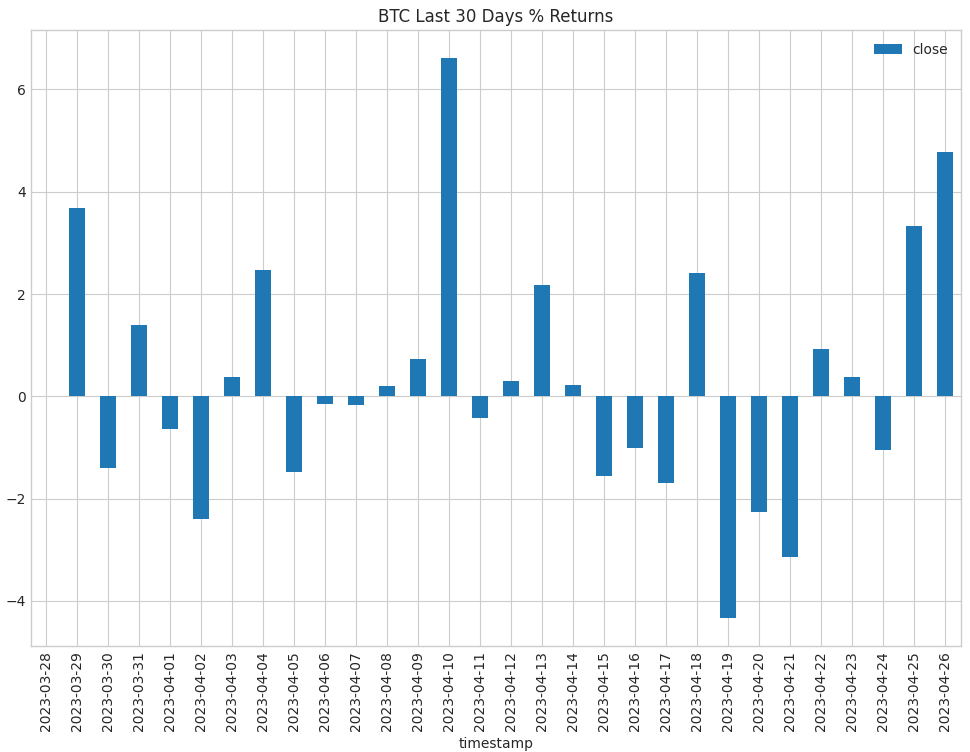

In [149]:
# Plot performance in last 30 days percentage change and save to Images
with plt.style.context('seaborn-whitegrid'):
    (btc_last_pct*100).plot(kind='bar', figsize=(12,8), legend=True, title="BTC Last 30 Days % Returns");
    plt.savefig("Images/BTCDailyPercentReturns.png")

In [150]:
import plotly.express as px

In [151]:
# Comparing Plotly
fig = px.bar(btc_last_pct*100, 
  y="close",
  x=btc_last_pct.index,
  title="BTC Last 30 Days % Returns",
  template="simple_white",
  labels={"close": "Daily Change (%)"},
  width=900, 
  height=800,
            )

fig.update_xaxes(title_text='Days', dtick="d1")

fig.update_layout(title_x=0.5, xaxis_tickformat='%d-%b')

# fig.write_image("Images/plotly_btc_last_30.png")